# Team - 29
# The Weather of 187 Countries in 2020 Dataset
#### In this dataset, data is collected from different weather stations across all 187 countries. It contains around 23 different features such as Snow, Snow Depth, Average Temp, Max Temp, Min Temp, Date, Country, Station, etc. and out of which many features contains more than 90% of the values as Null.

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
import warnings 
warnings.filterwarnings('ignore')

In [92]:
weather_data = pd.read_csv('/kaggle/input/the-weather-of-187-countries-in-2020/the weather of 187 countries in 2020.csv')

#### We are calculating how much value is in each column in this dataset in percentage.

In [93]:
(weather_data.isnull().sum())/weather_data.shape[0]

STATION            0.000000
Country/Region     0.000000
DATE               0.000000
Year               0.000000
Month              0.000000
Day                0.000000
PRCP               0.250763
SNWD               0.728970
TAVG               0.369059
TMAX               0.377624
TMIN               0.354878
SNOW               0.924319
LATITUDE           0.924785
LONGITUDE          0.924785
ELEVATION          0.924785
PRCP_ATTRIBUTES    0.995686
TAVG_ATTRIBUTES    0.997235
TMAX_ATTRIBUTES    0.995952
TMIN_ATTRIBUTES    0.995782
DAPR               0.999072
MDPR               0.999942
WESD               0.999999
SNWD_ATTRIBUTES    0.999746
dtype: float64

In [94]:
country = weather_data['Country/Region'].unique()

In [95]:
list(country)

['Comoros',
 'Georgia',
 'Nepal',
 'Philippines',
 'Monaco',
 'US',
 'Australia',
 'Namibia',
 'Saint Lucia',
 'Lebanon',
 'Zambia',
 'Malaysia',
 'Peru',
 'Kenya',
 'Belarus',
 'Iceland',
 'Lesotho',
 'Venezuela',
 'Albania',
 'Tanzania',
 'Greece',
 'Barbados',
 'Singapore',
 'Switzerland',
 'Sri Lanka',
 'China',
 'Gabon',
 'Guinea-Bissau',
 'Congo (Brazzaville)',
 'United Arab Emirates',
 'Tajikistan',
 'Syria',
 'Lithuania',
 'Paraguay',
 'Romania',
 'Maldives',
 'Jamaica',
 'Kuwait',
 'Finland',
 'Argentina',
 'Ethiopia',
 'Japan',
 'Cameroon',
 'Bhutan',
 'Botswana',
 'Pakistan',
 'Brazil',
 'Madagascar',
 'Eritrea',
 'Liberia',
 'Mali',
 'Thailand',
 'Egypt',
 'Ireland',
 'Belgium',
 'Luxembourg',
 'Fiji',
 'Italy',
 'Greenland',
 'Antigua and Barbuda',
 'Saint Vincent and the Grenadines',
 'Andorra',
 'Guinea',
 'Nigeria',
 'Ecuador',
 'Guatemala',
 'Afghanistan',
 'Suriname',
 'Djibouti',
 'Uganda',
 'Niger',
 'Israel',
 'Russia',
 'Chile',
 'Mexico',
 'Seychelles',
 'Bosnia 

In [96]:
len(weather_data['STATION'].unique())

6911

In [97]:
weather_data['SNWD'].value_counts()

0.0       248155
10.0       10321
20.0        4341
30.0        3419
150.0       1954
           ...  
3280.0         1
3040.0         1
3020.0         1
3110.0         1
485.0          1
Name: SNWD, Length: 779, dtype: int64

In [98]:
weather_data['SNOW'].value_counts()

0.0      95359
10.0      1113
20.0       753
30.0       506
5.0        480
         ...  
11.0         1
228.0        1
238.0        1
194.0        1
258.0        1
Name: SNOW, Length: 242, dtype: int64

#### The values of Longitude and Latitude are 92% null so to handle that I have tried to fill null values by filling with original latitude and longitude of each country. I have done that because I want to use the whole dataset for my model but then I have decided to work only on a particular country, so I have removed this code.

In [99]:
'''from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim'''

'from geopy.exc import GeocoderTimedOut\nfrom geopy.geocoders import Nominatim'

In [100]:
'''data = {'Country':country}'''

"data = {'Country':country}"

In [101]:
'''longitude = []
latitude = []
   
def findGeocode(country):
       
    try:
          
        geolocator = Nominatim(user_agent="your_app_name")

        return geolocator.geocode(country)
      
    except GeocoderTimedOut:
          
        return findGeocode(country)    
   
for i in (data['Country']):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
      
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)

    else:
        latitude.append(np.nan)
        longitude.append(np.nan)'''

'longitude = []\nlatitude = []\n   \ndef findGeocode(country):\n       \n    try:\n          \n        geolocator = Nominatim(user_agent="your_app_name")\n\n        return geolocator.geocode(country)\n      \n    except GeocoderTimedOut:\n          \n        return findGeocode(country)    \n   \nfor i in (data[\'Country\']):\n      \n    if findGeocode(i) != None:\n           \n        loc = findGeocode(i)\n      \n        latitude.append(loc.latitude)\n        longitude.append(loc.longitude)\n\n    else:\n        latitude.append(np.nan)\n        longitude.append(np.nan)'

In [102]:
'''weather_data[weather_data['Country/Region'] == 'India']['LONGITUDE'].fillna(longitude[0])'''

"weather_data[weather_data['Country/Region'] == 'India']['LONGITUDE'].fillna(longitude[0])"

In [103]:
'''x = weather_data['Country/Region'] == 'India'
weather_data.loc[x]'''

"x = weather_data['Country/Region'] == 'India'\nweather_data.loc[x]"

In [104]:
'''for country_name, lon, lat in zip(country, longitude, latitude):
    mask = weather_data['Country/Region'] == country_name
    
    if mask.any():

        weather_data.loc[mask, 'LONGITUDE'] = lon
        weather_data.loc[mask, 'LATITUDE'] = lat'''

"for country_name, lon, lat in zip(country, longitude, latitude):\n    mask = weather_data['Country/Region'] == country_name\n    \n    if mask.any():\n\n        weather_data.loc[mask, 'LONGITUDE'] = lon\n        weather_data.loc[mask, 'LATITUDE'] = lat"

#### The country that I have selected is "INDIA" for my predictions. There are so many unnecessary columns with so many null values, so I am dropping all such columns.

In [105]:
weather_india = weather_data[weather_data['Country/Region']=='India'].copy()

In [106]:
weather_india_final = weather_india.drop(['ELEVATION', 'PRCP_ATTRIBUTES','TAVG_ATTRIBUTES','TMAX_ATTRIBUTES','TMIN_ATTRIBUTES','DAPR','MDPR','WESD','SNWD_ATTRIBUTES','Year','SNOW'], axis=1)

<Axes: >

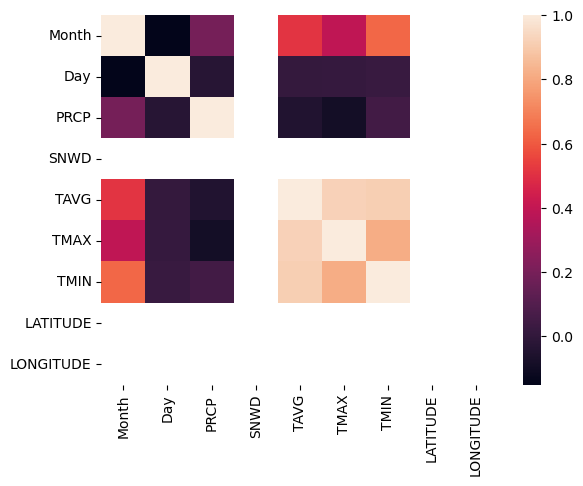

In [107]:
sns.heatmap(weather_india_final.corr())

In [108]:
weather_india_final

STATION Country/Region        DATE  Month  Day  PRCP  SNWD  TAVG  \
589897  IN017111200          India  2020-01-22      1   22   NaN   NaN  22.5   
589898  IN017111200          India  2020-01-23      1   23   NaN   NaN  24.1   
589899  IN017111200          India  2020-01-24      1   24   NaN   NaN  23.2   
589900  IN017111200          India  2020-01-25      1   25   NaN   NaN  21.4   
589901  IN017111200          India  2020-01-26      1   26   NaN   NaN  21.3   
...             ...            ...         ...    ...  ...   ...   ...   ...   
612899  IN004102500          India  2020-07-23      7   23   6.1   NaN  28.3   
612900  IN004102500          India  2020-07-24      7   24   0.0   NaN  25.7   
612901  IN004102500          India  2020-07-25      7   25  72.9   NaN  28.9   
612902  IN004102500          India  2020-07-26      7   26   0.0   NaN  31.3   
612903  IN004102500          India  2020-07-27      7   27   NaN   NaN  30.6   

        TMAX  TMIN  LATITUDE  LONGITUDE  
589897   NaN  16.1       NaN        NaN  
589898   NaN  18.5       NaN        NaN  
589899   NaN   NaN       NaN        NaN  
589900   NaN   NaN       NaN        NaN  
589901   NaN   NaN       NaN        NaN  
...      ...   ...       ...        ...  
612899   NaN  24.8       NaN        NaN  
612900   NaN   NaN       NaN        NaN  
612901   NaN   NaN       NaN        NaN  
612902  35.8  27.6       NaN        NaN  
612903   NaN  28.6       NaN        NaN  

[23007 rows x 12 columns]

In [109]:
weather_india_final['SNWD'].isnull().sum()

23007

In [110]:
weather_india_final['PRCP'].isnull().sum()

15145

In [111]:
weather_india_final['TMIN'].isnull().sum()

4037

In [112]:
weather_india_final = weather_india_final.drop(['SNWD','LATITUDE','LONGITUDE','TMAX','Country/Region','Day','Month'],axis=1)

In [113]:
stat = weather_india_final['STATION'].unique()

#### Each Weather station has 7 months of data but there are some stations which has quite low data. I am just dropping such rows with that station ID.

In [114]:
remove_stat = []
for i in stat:
    if len(weather_india_final[weather_india_final['STATION']==i])<50:
        remove_stat.append(i)

In [115]:
remove_stat

['IN009100200',
 'IN005030100',
 'IN012180300',
 'IN011330900',
 'IN019070100',
 'IN024059900',
 'IN014020800']

In [116]:
weather_india_final.drop(weather_india_final[weather_india_final.STATION.isin(remove_stat)].index, axis = 0, inplace = True)

In [117]:
weather_india_final

STATION        DATE  PRCP  TAVG  TMIN
589897  IN017111200  2020-01-22   NaN  22.5  16.1
589898  IN017111200  2020-01-23   NaN  24.1  18.5
589899  IN017111200  2020-01-24   NaN  23.2   NaN
589900  IN017111200  2020-01-25   NaN  21.4   NaN
589901  IN017111200  2020-01-26   NaN  21.3   NaN
...             ...         ...   ...   ...   ...
612899  IN004102500  2020-07-23   6.1  28.3  24.8
612900  IN004102500  2020-07-24   0.0  25.7   NaN
612901  IN004102500  2020-07-25  72.9  28.9   NaN
612902  IN004102500  2020-07-26   0.0  31.3  27.6
612903  IN004102500  2020-07-27   NaN  30.6  28.6

[22980 rows x 5 columns]

#### By using Label Encoding I am just giving a unique number to each unique station.

In [118]:
label_encoder = preprocessing.LabelEncoder()
weather_india_final['STATION']= label_encoder.fit_transform(weather_india_final['STATION'])

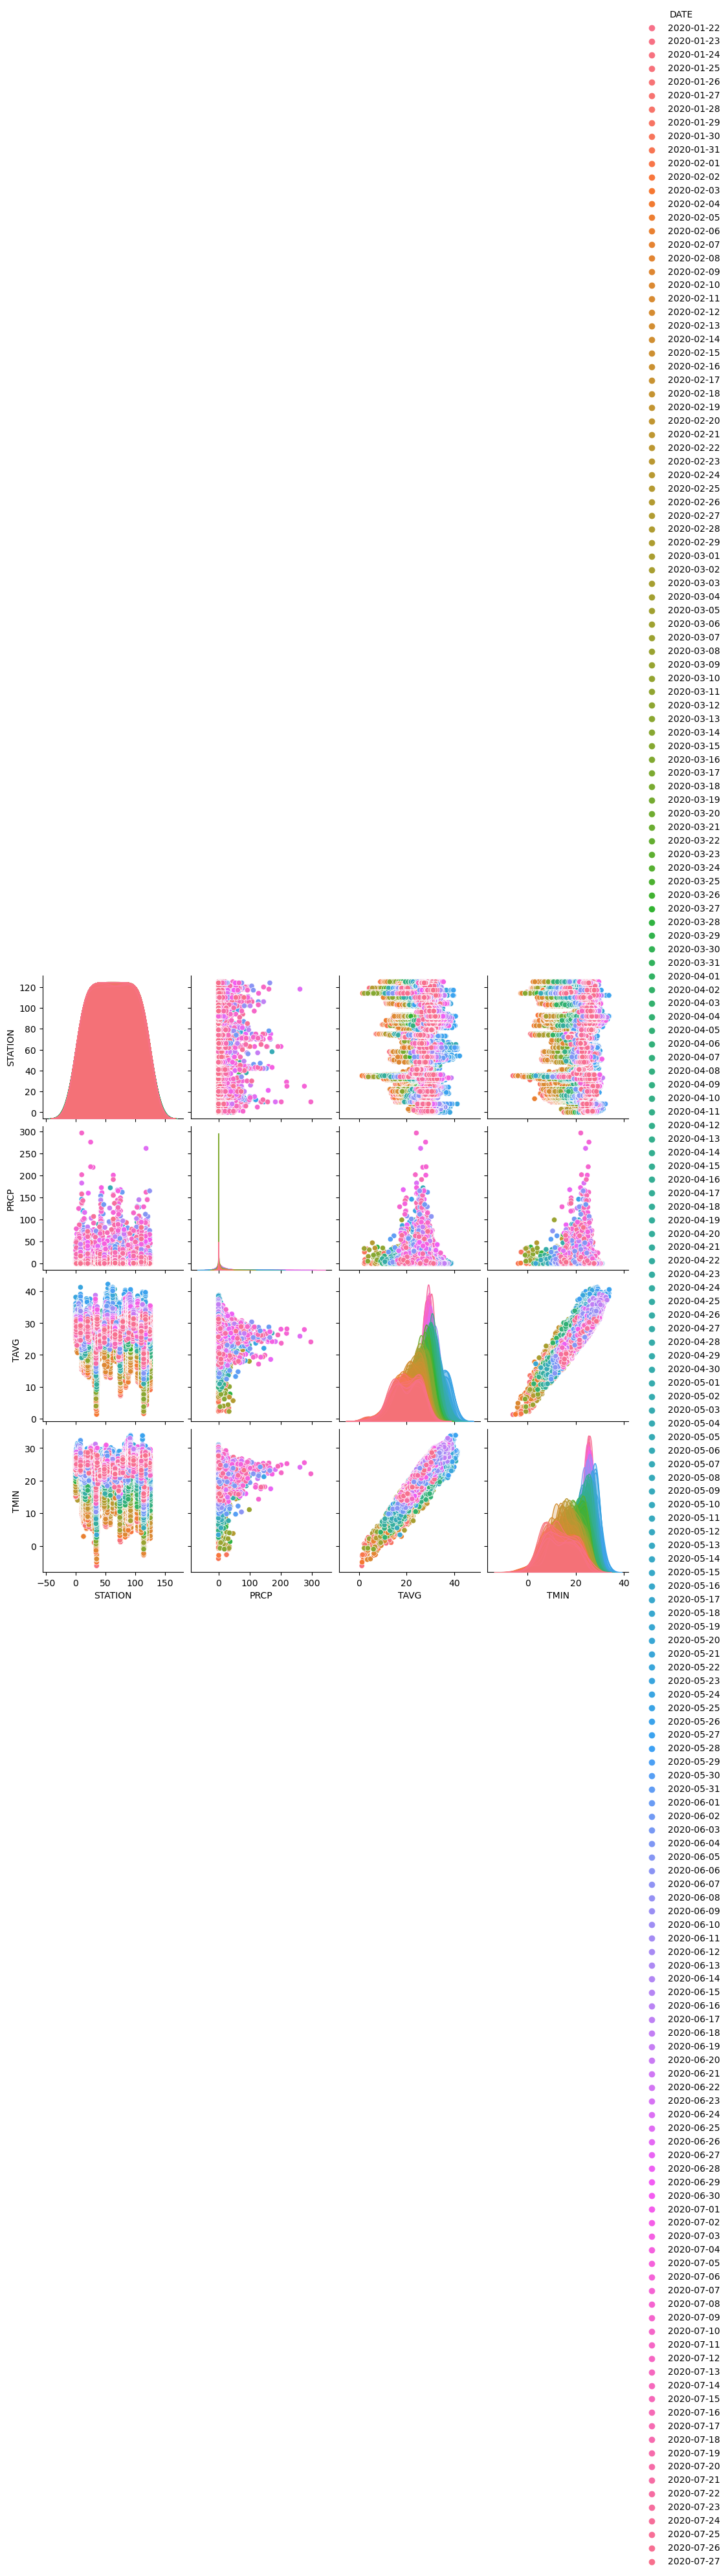

In [119]:
sns.pairplot(weather_india_final,hue='DATE')

#### Making 'DATE' column as our index

In [120]:
weather_india_final.set_index('DATE',inplace = True)

In [121]:
weather_india_final

STATION  PRCP  TAVG  TMIN
DATE                                 
2020-01-22       80   NaN  22.5  16.1
2020-01-23       80   NaN  24.1  18.5
2020-01-24       80   NaN  23.2   NaN
2020-01-25       80   NaN  21.4   NaN
2020-01-26       80   NaN  21.3   NaN
...             ...   ...   ...   ...
2020-07-23       20   6.1  28.3  24.8
2020-07-24       20   0.0  25.7   NaN
2020-07-25       20  72.9  28.9   NaN
2020-07-26       20   0.0  31.3  27.6
2020-07-27       20   NaN  30.6  28.6

[22980 rows x 4 columns]

In [122]:
count_1 = weather_india_final['PRCP'].value_counts()
result1 = count_1[count_1>100]
result1

0.0     2687
2.0      386
1.0      376
0.5      370
3.0      310
0.3      275
4.1      253
5.1      197
6.1      195
7.1      169
8.9      152
0.8      143
7.9      129
10.9     115
9.9      110
Name: PRCP, dtype: int64

#### By using Foward fill method I have filled all null values in 'PRCP' column. Still there are some rows with some null values so I have filled that remaining rows with 0.

In [123]:
weather_india_final['PRCP'].fillna(method = 'ffill',inplace=True)
weather_india_final['PRCP'].fillna(0,inplace=True)

In [124]:
weather_india_final['PRCP'].isnull().sum()

0

In [125]:
weather_india_final['PRCP'].value_counts()

0.0      16506
2.0        544
1.0        437
0.5        395
3.0        389
         ...  
101.6        1
201.9        1
45.7         1
59.2         1
115.1        1
Name: PRCP, Length: 270, dtype: int64

<Axes: xlabel='DATE'>

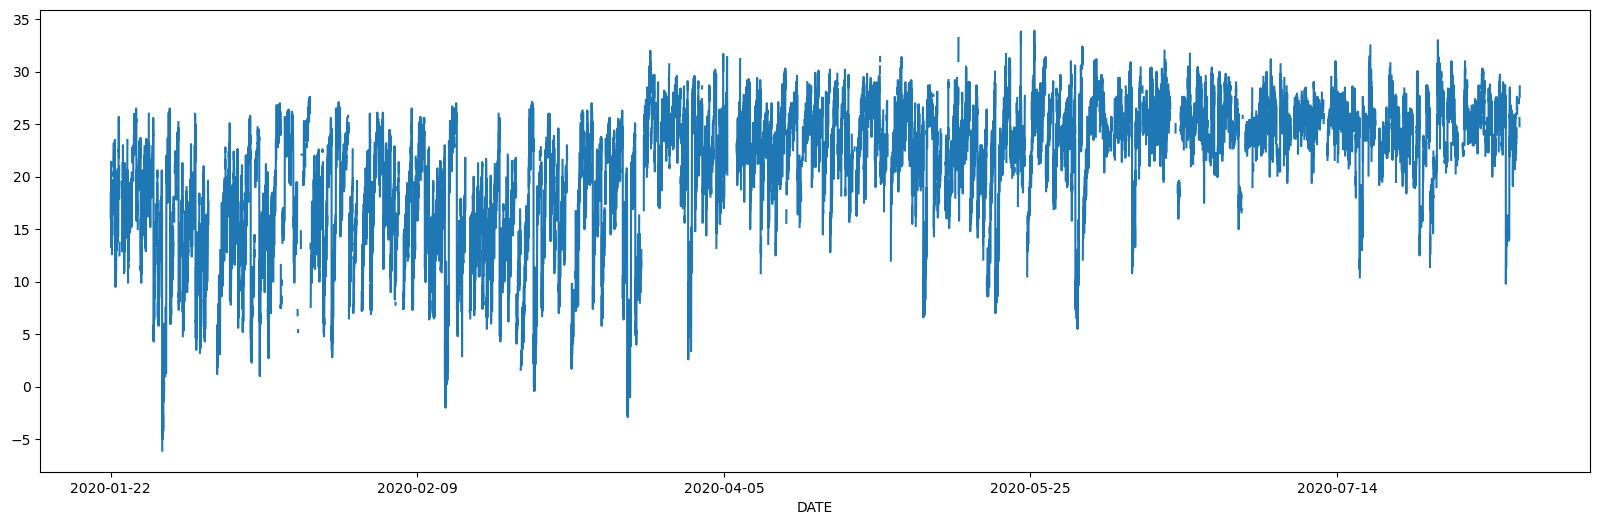

In [126]:
weather_india_final['TMIN'].plot(figsize=(20, 6))

In [127]:
weather_india_final['TMIN'].mean()

20.949076712039677

In [128]:
weather_india_final['TMIN'].median()

22.5

In [129]:
weather_india_final['TMIN'].mode()

0    25.0
Name: TMIN, dtype: float64

#### Filling null values of 'TMIN' by taking median of all values in that column.

In [130]:
weather_india_final['TMIN'].fillna(weather_india_final['TMIN'].median(),inplace=True)

In [131]:
weather_india_final

STATION  PRCP  TAVG  TMIN
DATE                                 
2020-01-22       80   0.0  22.5  16.1
2020-01-23       80   0.0  24.1  18.5
2020-01-24       80   0.0  23.2  22.5
2020-01-25       80   0.0  21.4  22.5
2020-01-26       80   0.0  21.3  22.5
...             ...   ...   ...   ...
2020-07-23       20   6.1  28.3  24.8
2020-07-24       20   0.0  25.7  22.5
2020-07-25       20  72.9  28.9  22.5
2020-07-26       20   0.0  31.3  27.6
2020-07-27       20   0.0  30.6  28.6

[22980 rows x 4 columns]

#### Plotting Violinplots and Boxplots to analyse how data is distributed of features 'PRCP', 'TMIN', 'TMAX'.

<Axes: xlabel='PRCP'>

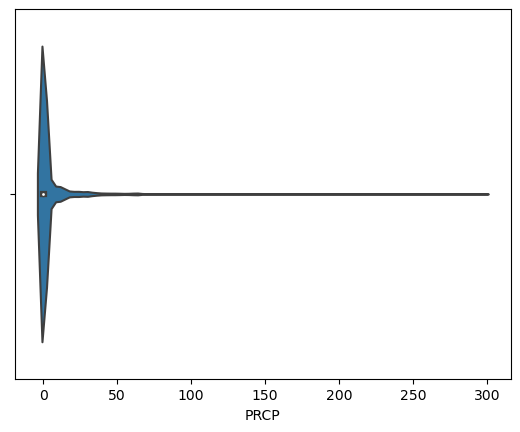

In [132]:
sns.violinplot(x=weather_india_final['PRCP'])

<Axes: xlabel='TAVG'>

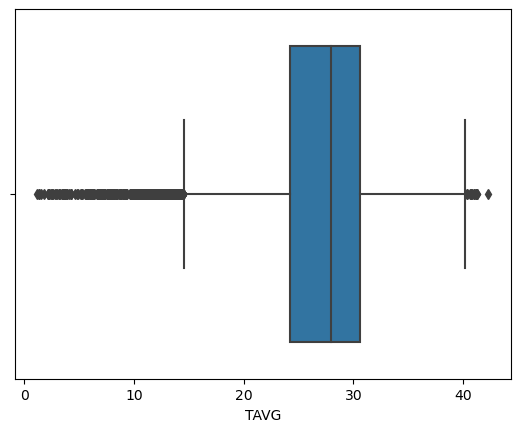

In [133]:
sns.boxplot(x=weather_india_final['TAVG'])

<Axes: xlabel='TAVG'>

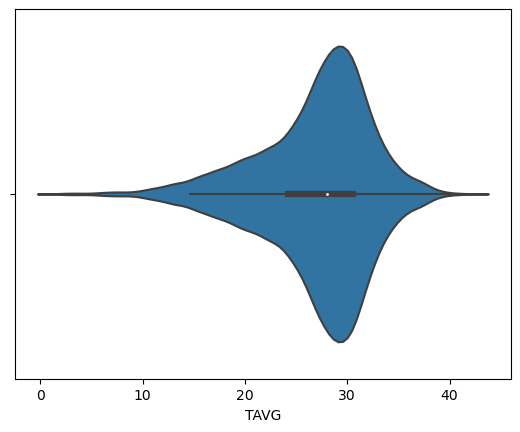

In [134]:
sns.violinplot(x=weather_india_final['TAVG'])

<Axes: xlabel='TMIN'>

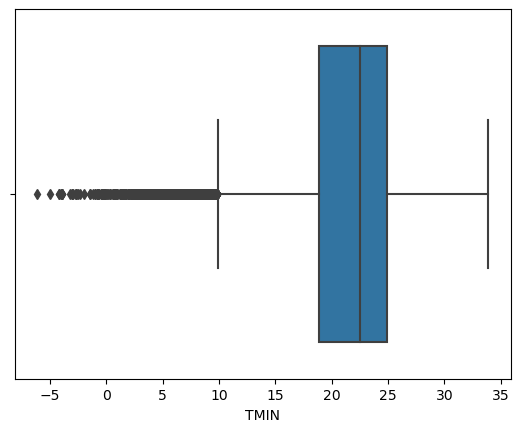

In [135]:
sns.boxplot(x=weather_india_final['TMIN'])

<Axes: xlabel='TMIN'>

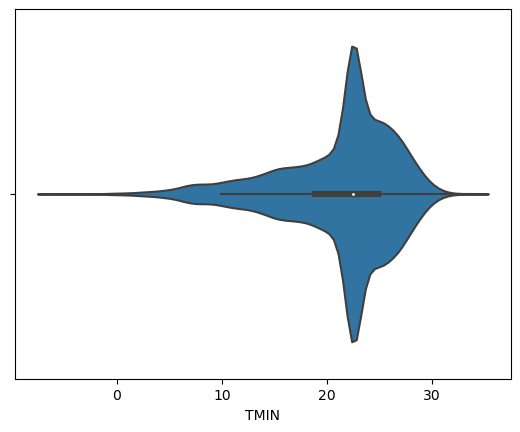

In [136]:
sns.violinplot(x=weather_india_final['TMIN'])

In [137]:
weather_india_final.index = pd.to_datetime(weather_india_final.index)

In [138]:
weather_india_final.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
           dtype='int64', name='DATE', length=22980)

<Axes: xlabel='DATE'>

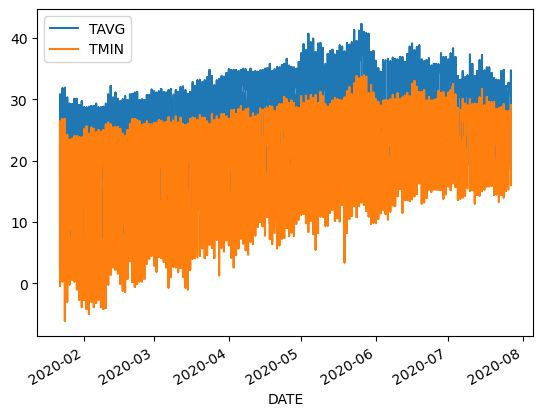

In [139]:
weather_india_final[['TAVG','TMIN']].plot()

#### For our prediction I have created another column named 'Target' in which I have just shifted up row 'TAVG' by 1 day. So it is the TAVG of next day.

In [140]:
weather_india_final['Target'] = weather_india_final.shift(-1)['TAVG']

In [141]:
weather_india_final = weather_india_final.iloc[:-1,:].copy()

In [142]:
weather_india_final

STATION  PRCP  TAVG  TMIN  Target
DATE                                         
2020-01-22       80   0.0  22.5  16.1    24.1
2020-01-23       80   0.0  24.1  18.5    23.2
2020-01-24       80   0.0  23.2  22.5    21.4
2020-01-25       80   0.0  21.4  22.5    21.3
2020-01-26       80   0.0  21.3  22.5    21.2
...             ...   ...   ...   ...     ...
2020-07-22       20   1.0  30.3  25.6    28.3
2020-07-23       20   6.1  28.3  24.8    25.7
2020-07-24       20   0.0  25.7  22.5    28.9
2020-07-25       20  72.9  28.9  22.5    31.3
2020-07-26       20   0.0  31.3  27.6    30.6

[22979 rows x 5 columns]

<Axes: >

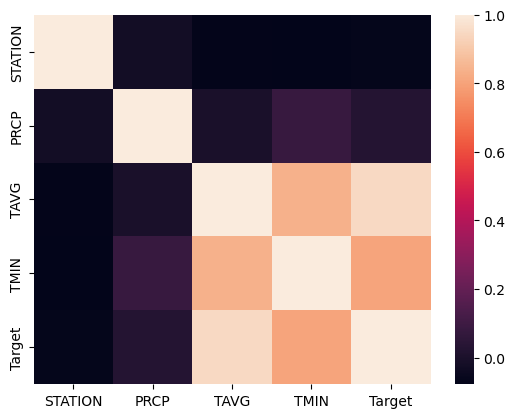

In [143]:
sns.heatmap(weather_india_final.corr())

In [144]:
weather_india_final[weather_india_final['STATION'] == 85]

STATION  PRCP  TAVG  TMIN  Target
DATE                                         
2020-01-22       85   0.0  15.5  10.8    14.3
2020-01-23       85   0.0  14.3   9.5    15.1
2020-01-24       85   0.0  15.1   7.4    15.9
2020-01-25       85   0.0  15.9   7.6    18.5
2020-01-26       85   0.0  18.5   8.7    19.6
...             ...   ...   ...   ...     ...
2020-07-23       85   0.5  31.7  27.2    24.7
2020-07-24       85   0.5  24.7  22.5    28.2
2020-07-25       85  93.0  28.2  21.4    29.4
2020-07-26       85   1.0  29.4  24.2    31.1
2020-07-27       85   0.0  31.1  25.8    28.8

[188 rows x 5 columns]

In [145]:
weather_india_final

STATION  PRCP  TAVG  TMIN  Target
DATE                                         
2020-01-22       80   0.0  22.5  16.1    24.1
2020-01-23       80   0.0  24.1  18.5    23.2
2020-01-24       80   0.0  23.2  22.5    21.4
2020-01-25       80   0.0  21.4  22.5    21.3
2020-01-26       80   0.0  21.3  22.5    21.2
...             ...   ...   ...   ...     ...
2020-07-22       20   1.0  30.3  25.6    28.3
2020-07-23       20   6.1  28.3  24.8    25.7
2020-07-24       20   0.0  25.7  22.5    28.9
2020-07-25       20  72.9  28.9  22.5    31.3
2020-07-26       20   0.0  31.3  27.6    30.6

[22979 rows x 5 columns]

In [146]:
weather_india_final['STATION']

DATE
2020-01-22    80
2020-01-23    80
2020-01-24    80
2020-01-25    80
2020-01-26    80
              ..
2020-07-22    20
2020-07-23    20
2020-07-24    20
2020-07-25    20
2020-07-26    20
Name: STATION, Length: 22979, dtype: int64

In [147]:
stations = weather_india_final['STATION'].unique()
stations

array([ 80,  86,  23,  26,  10,  44,   2,  29,  30,  70, 108,  51,  35,
        42, 105,   9, 120, 104,  11,  24,  84,  87,  93,  61,  54,  75,
        82,  77,  90,  64, 118,  27,  94, 125,  96,  31,  39,  83,  81,
        99, 113,  46, 101,  72,  18,  43,  45,  57,  59,  28, 109,   5,
        33, 107,  40,   4,  56,  15,  67,  21,  63,  19,  95, 106,  60,
         3,  12, 102,  55, 103, 122,  85,  78,  98,  52,  58, 111,  65,
        76,  34,  71,  47,  88,  13, 123,  49,  14,  62,  89, 116,  50,
        73,  32,  53,  16,  38,  36, 119,  69, 100, 115,  37,  91,   7,
        41, 121, 112,  48,  68,  74,  92, 124,   0,   6,  17,  25,  22,
         1,  66,  79,  97, 117, 114,   8, 110,  20])

#### Plotting a heatmap of correlation of all columns in our dataframe.

<Axes: >

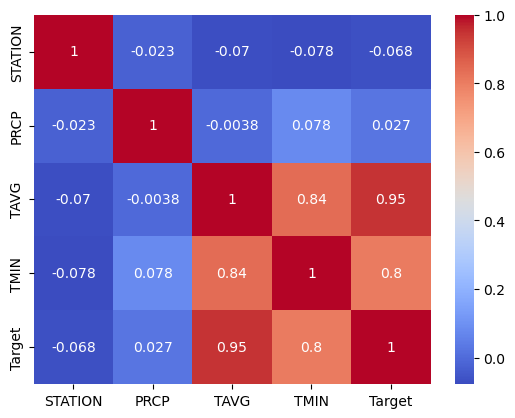

In [148]:
sns.heatmap(weather_india_final.corr(),annot=True, cmap='coolwarm')

#### For predictions I have first 6 months data into train set and last month that is seventh month in test data. So my model is to give Average Temperature of next day of whole test data that is seventh month. And I have for all stations that is present in India.

#### For Ridge Regression I have used GridSearchCV so it will find best parameters for all stations and evaluate our model. I have used three evaluation metrics that is MAE(Mean Absolute Error), MSE(Mean Squared Error), Accuracy. I have done Standard Scaling to our X_train and X_test.

#### For each station I have plotted actual and predictions target for test data.
#### Similarly I have done for SVR(Support Vector Regressor).

# 1. Ridge Regression

In [149]:
params = {'alpha': [0.0006,0.0009,0.0003,0.001,0.0015,0.002,0.1,0.3,0.6,0.005,0.003,0.09,0.06,0.006,1,5,8,10,20],
          'solver' : ['auto', 'svd', 'cholesky', 'saga','lsqr', 'sparse_cg', 'sag']
         }

In [150]:
Ridge_metrics = pd.DataFrame(columns=['Station', 'MAE', 'MSE','Accuracy'])

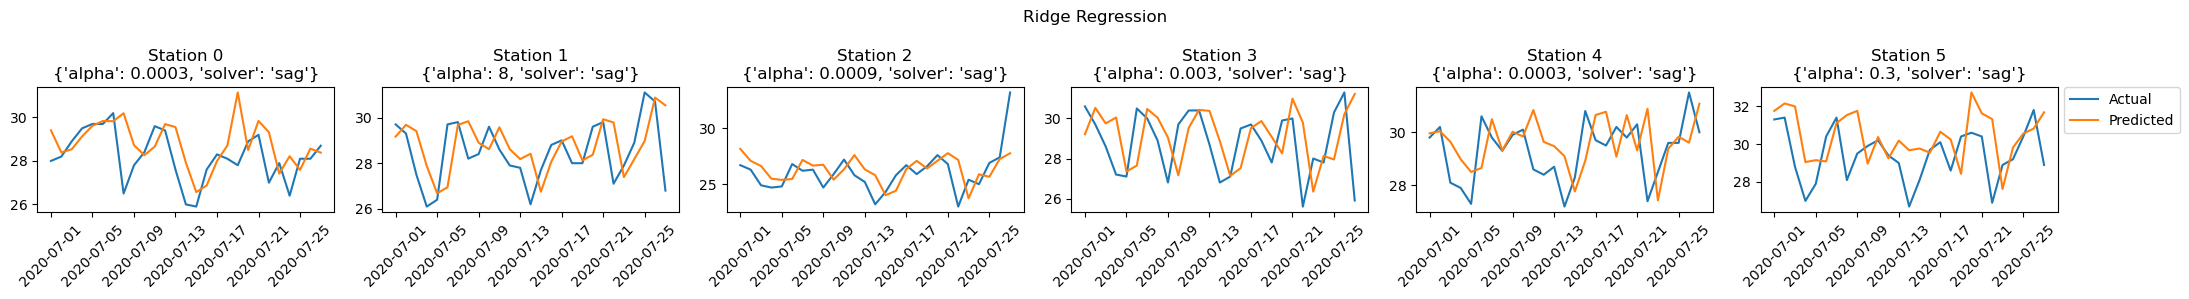

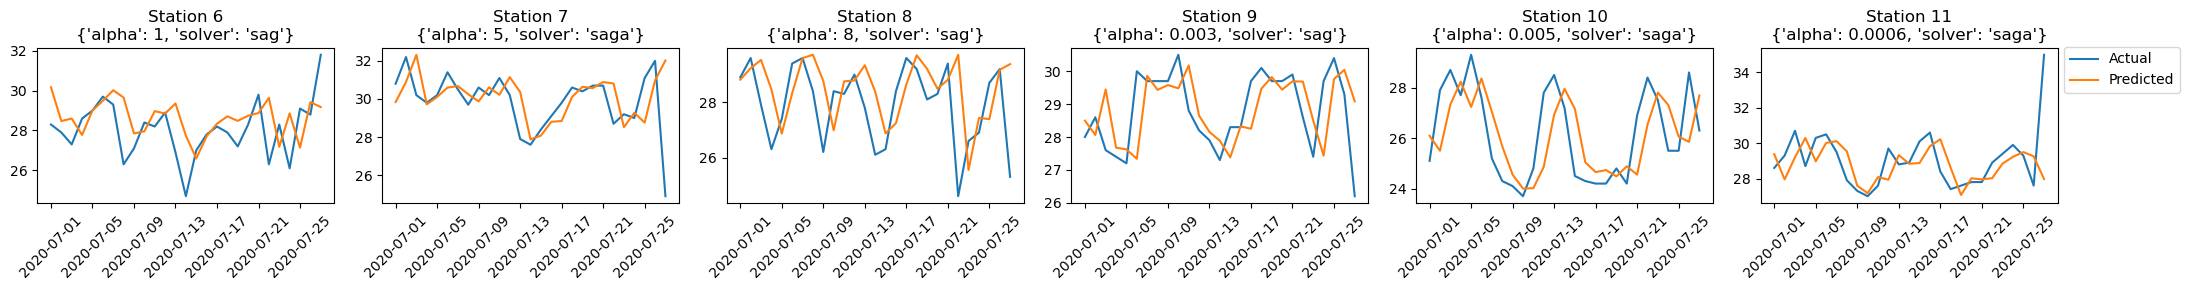

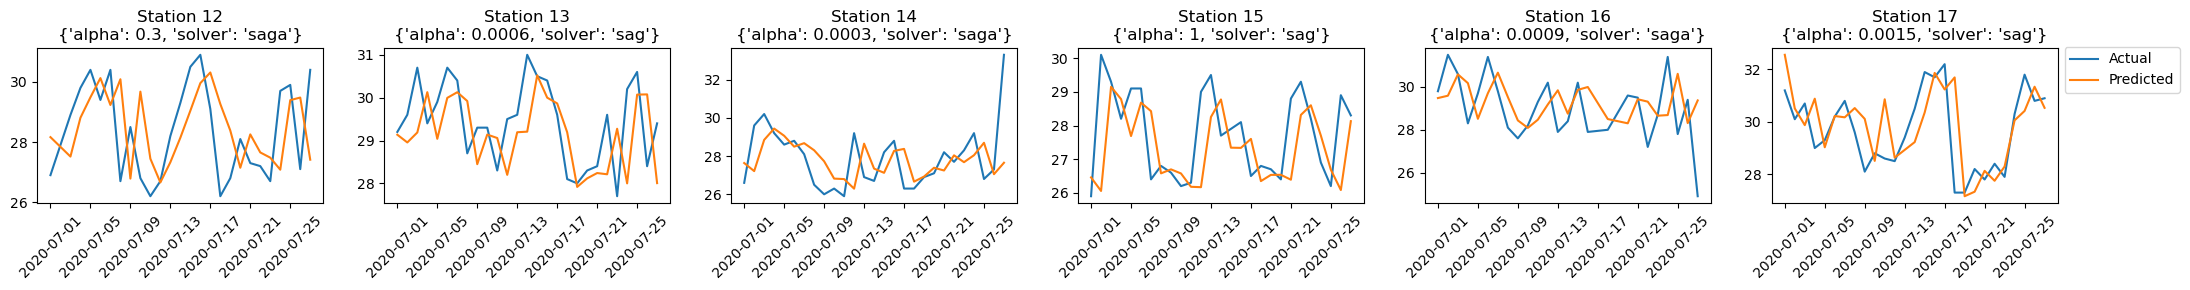

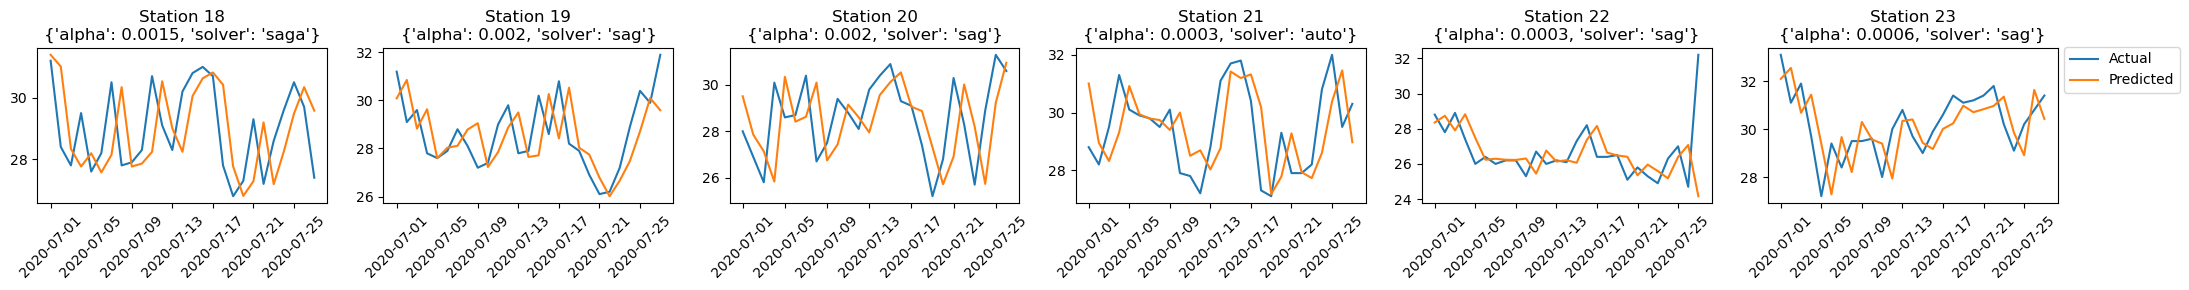

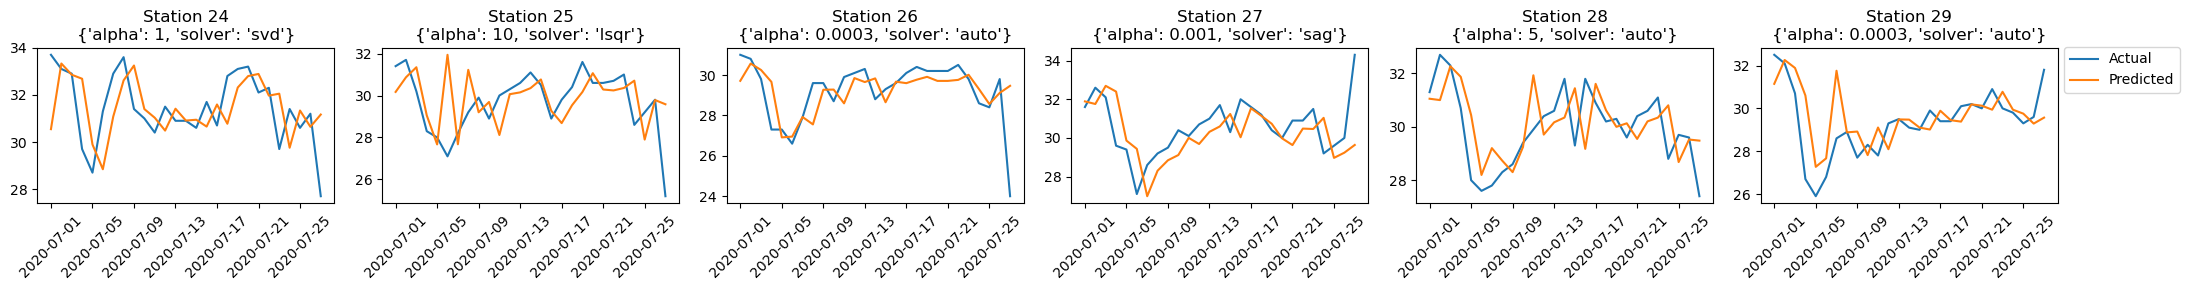

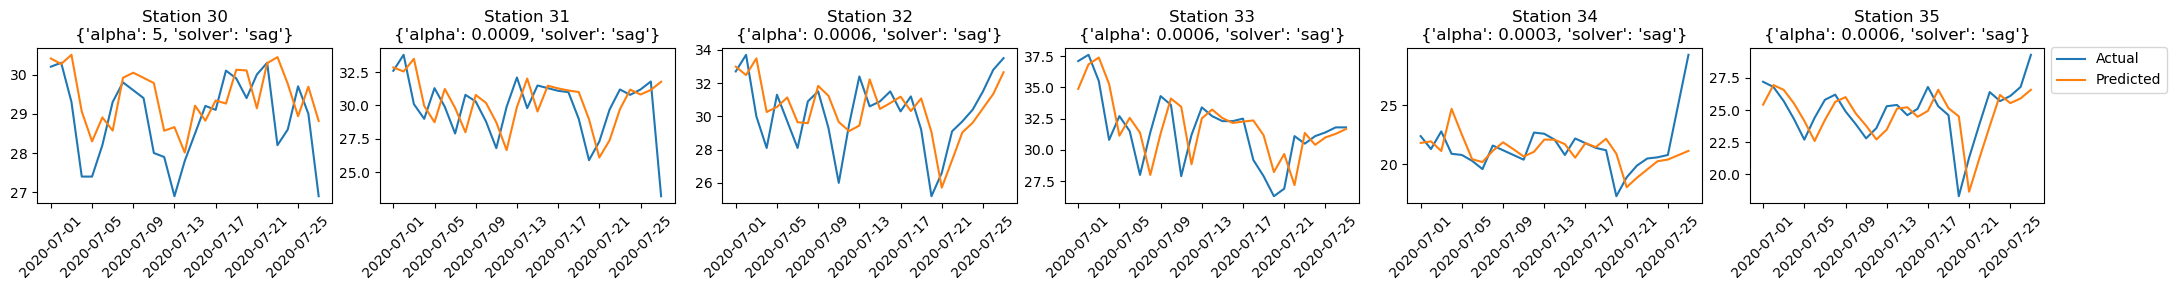

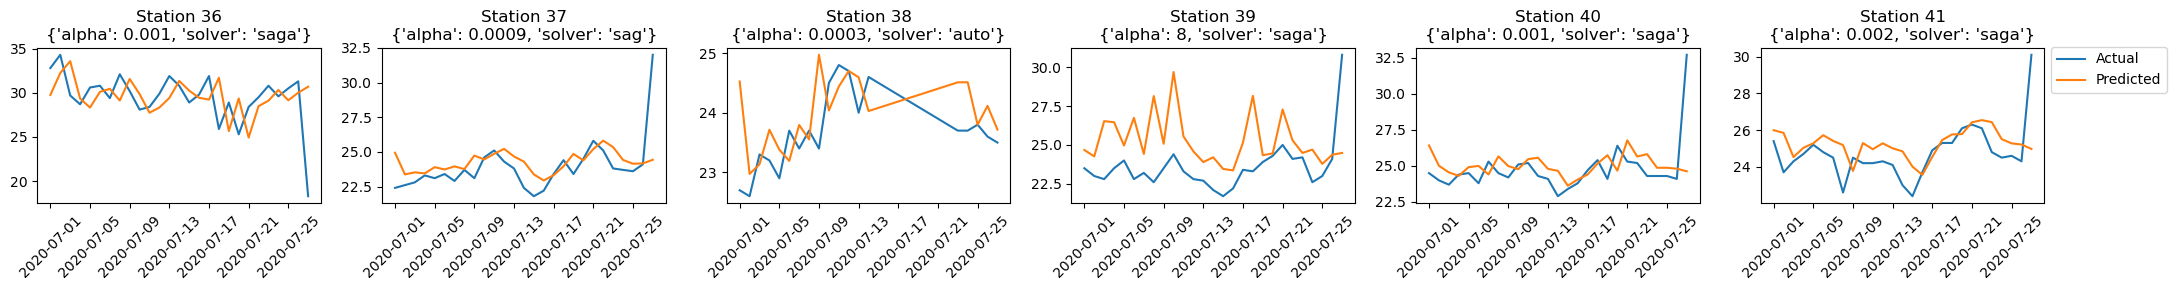

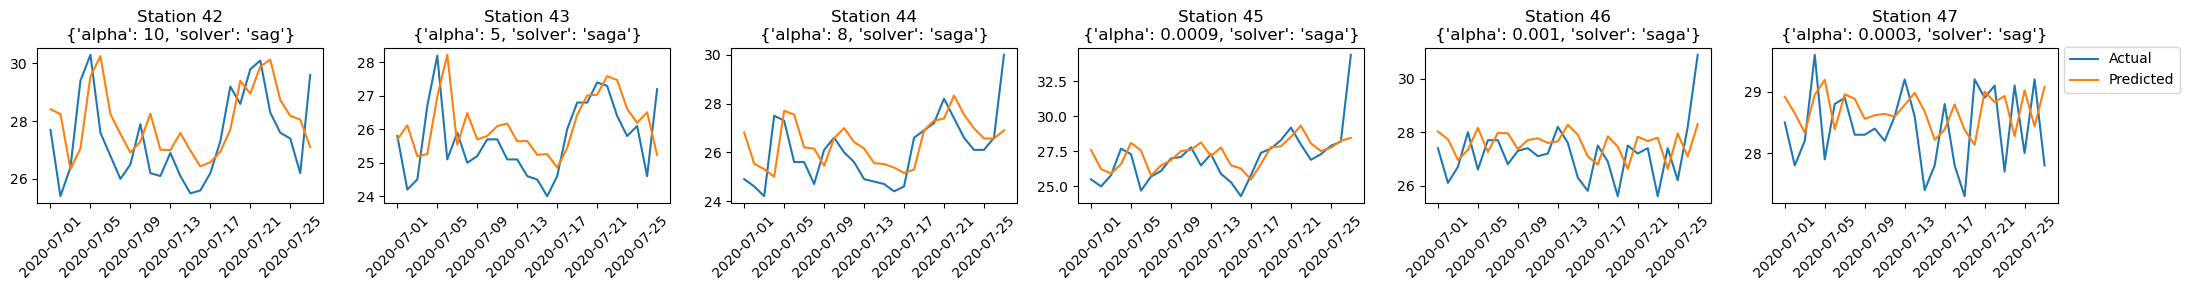

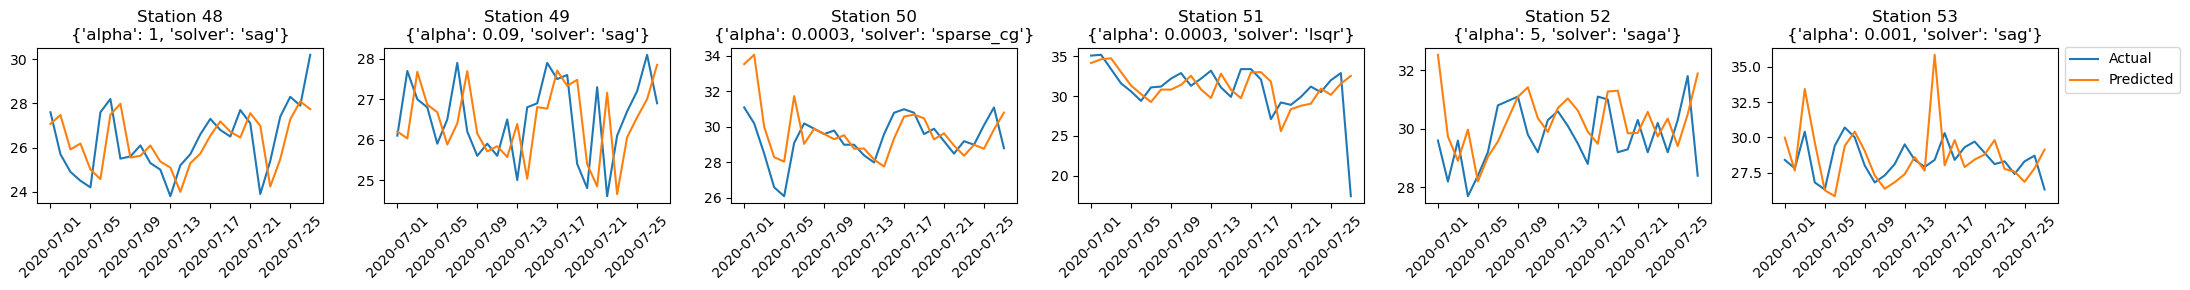

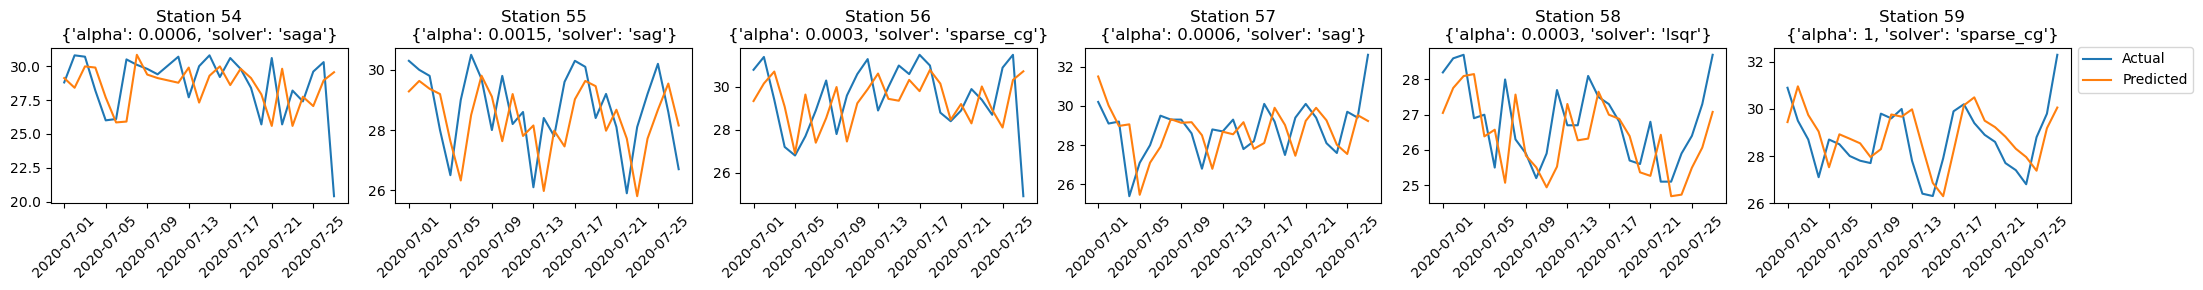

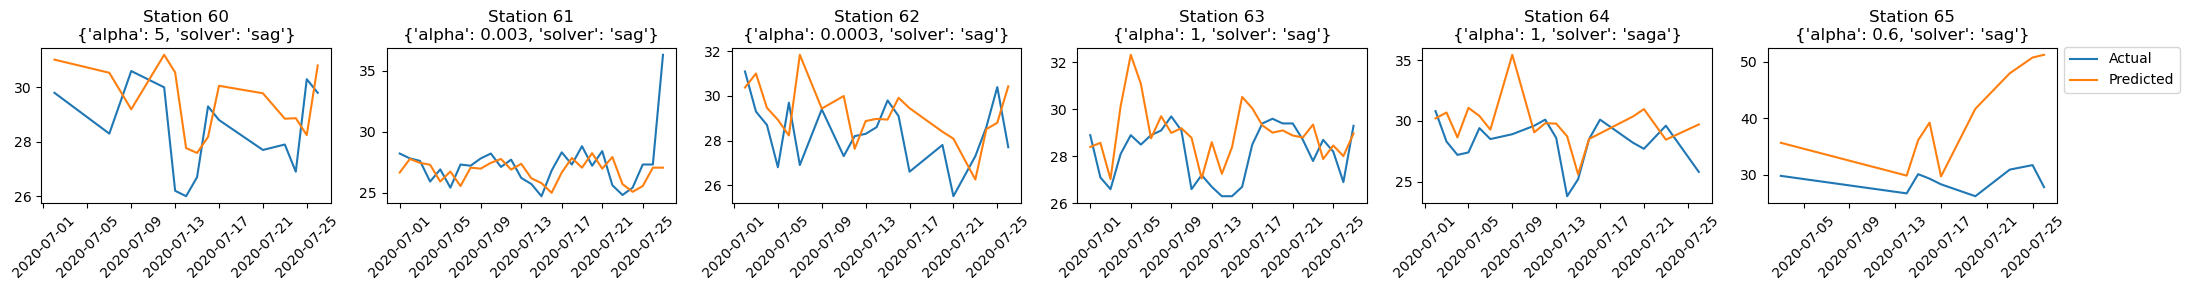

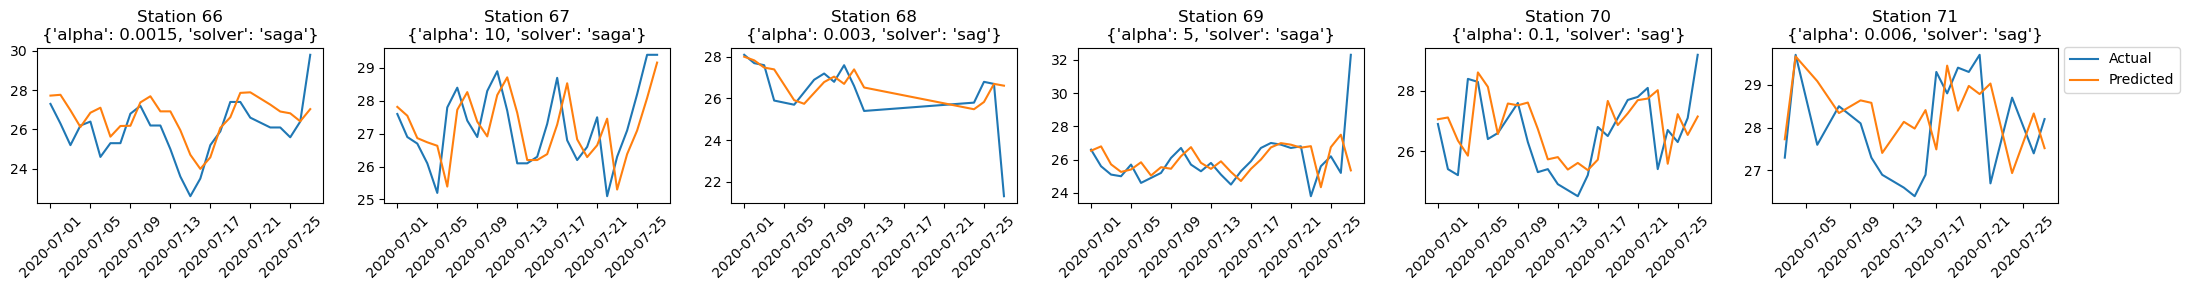

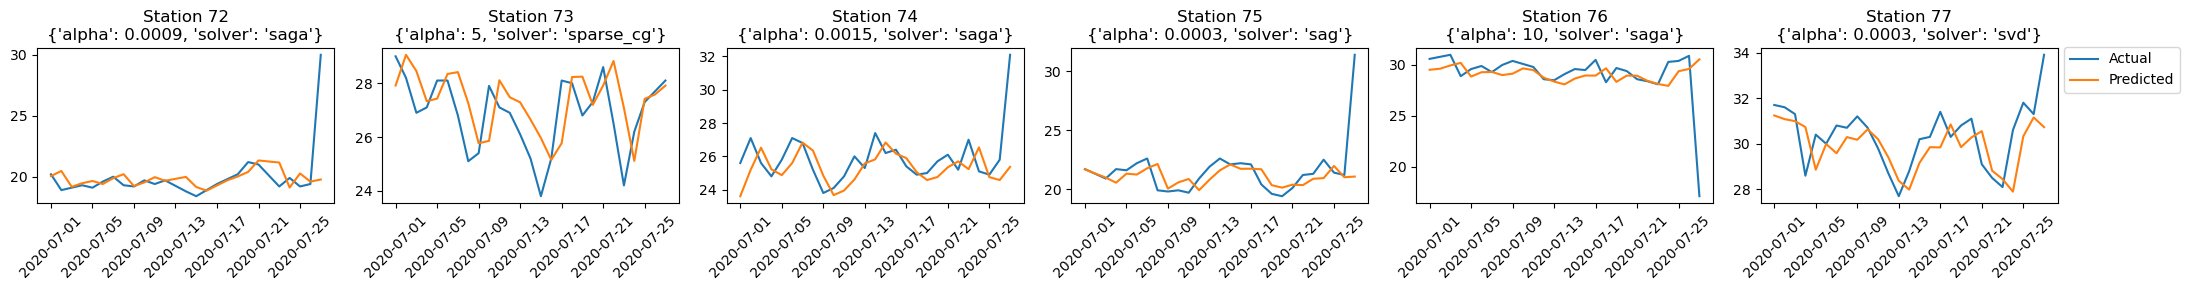

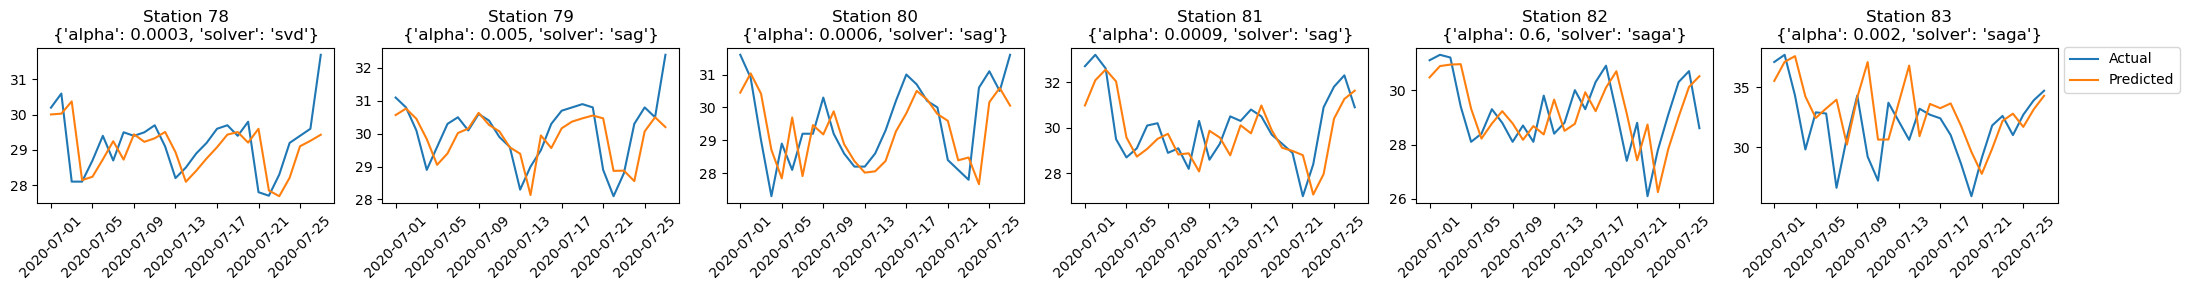

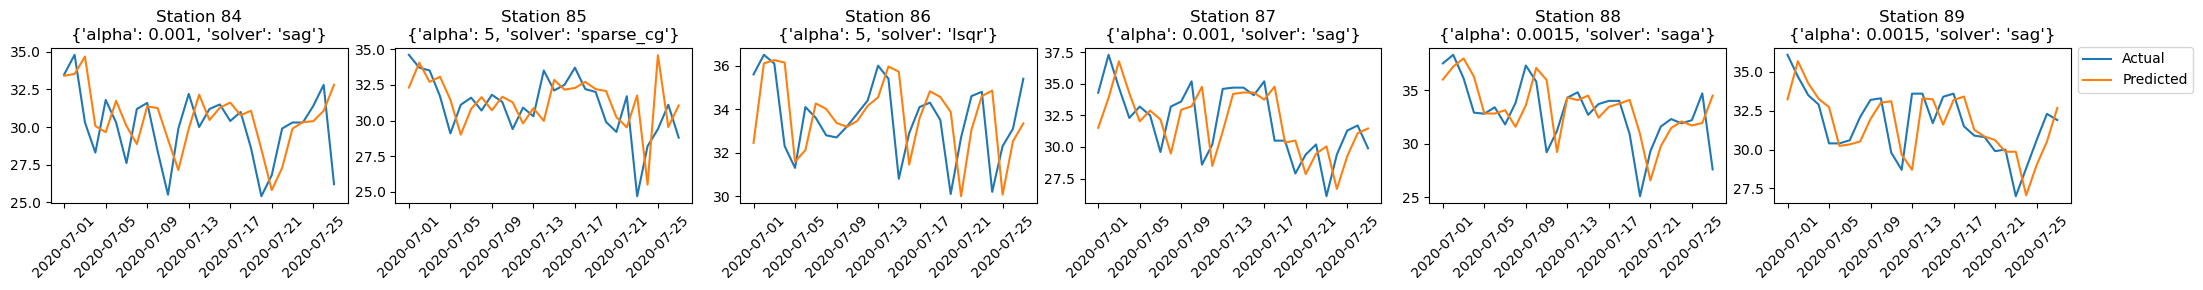

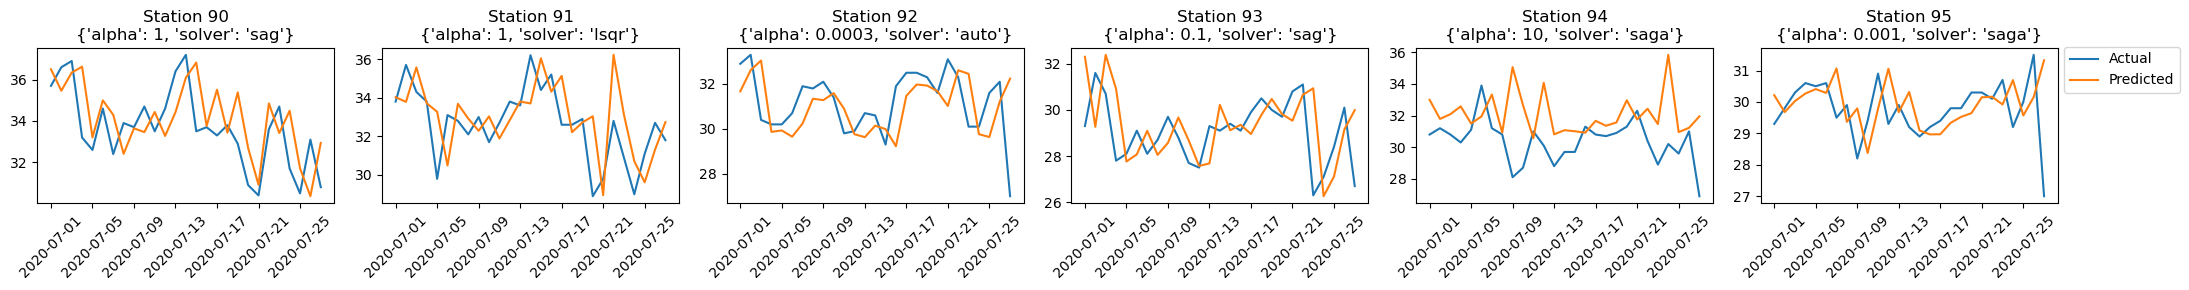

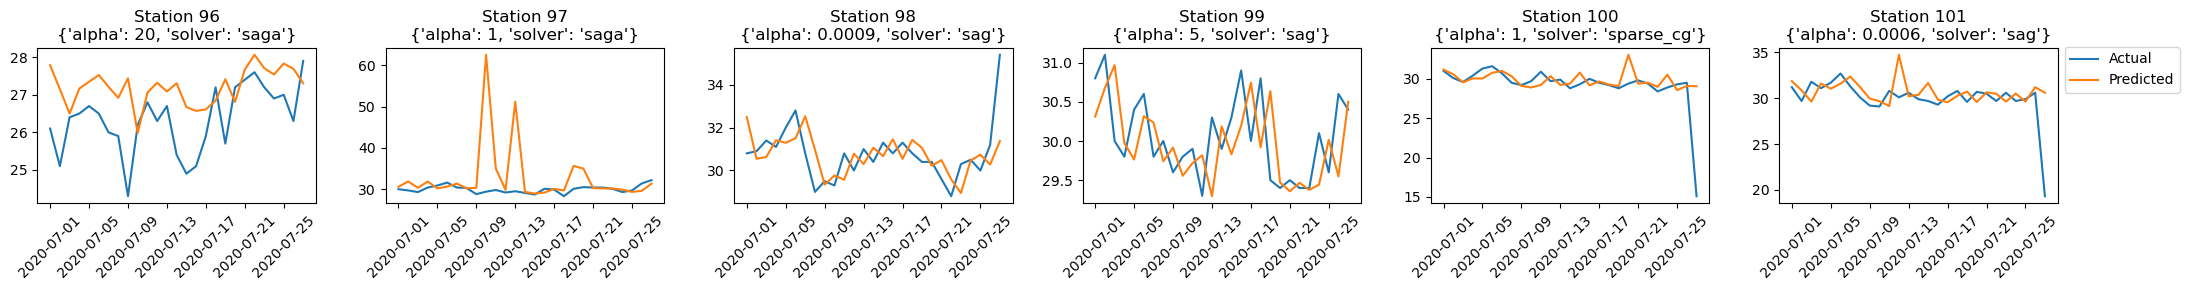

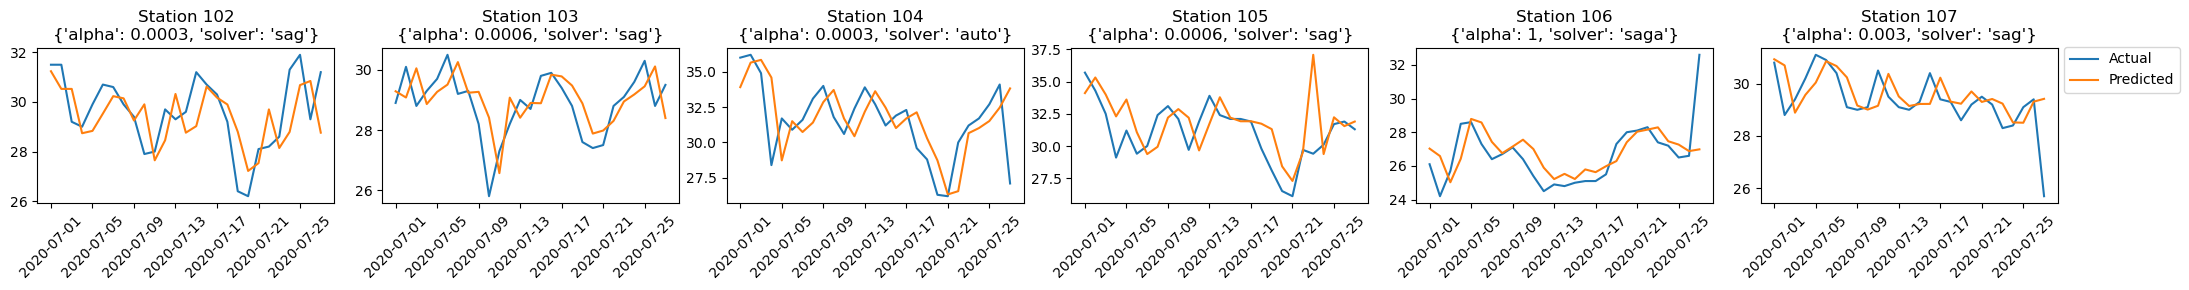

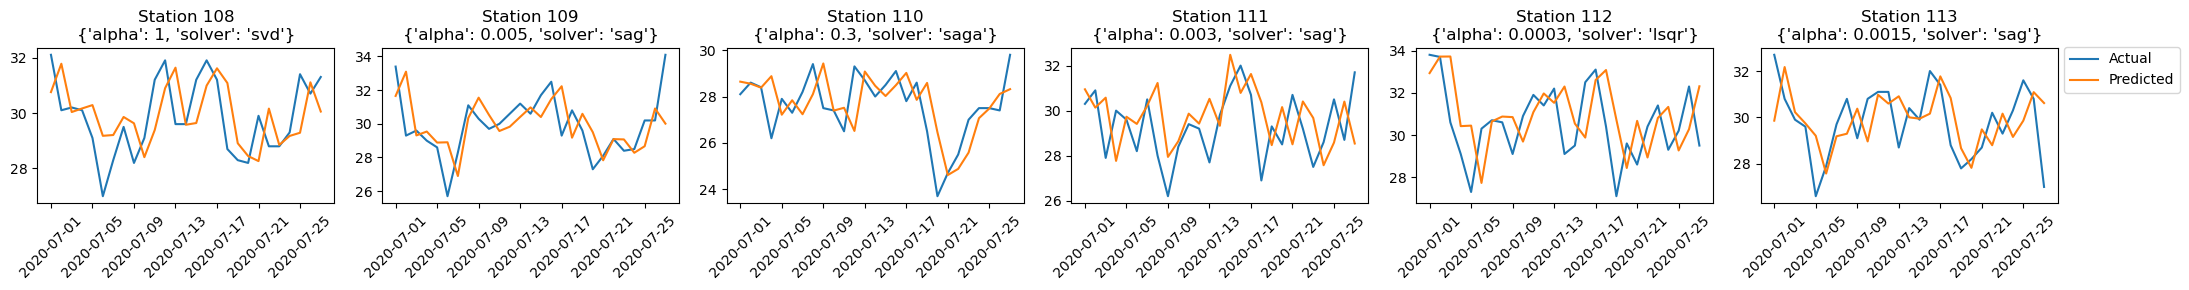

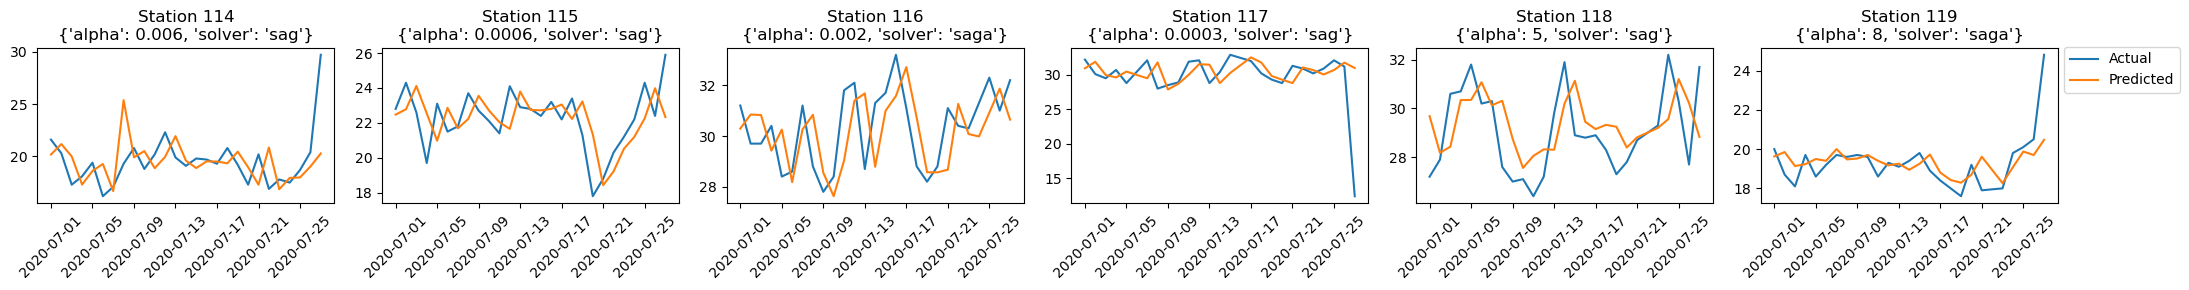

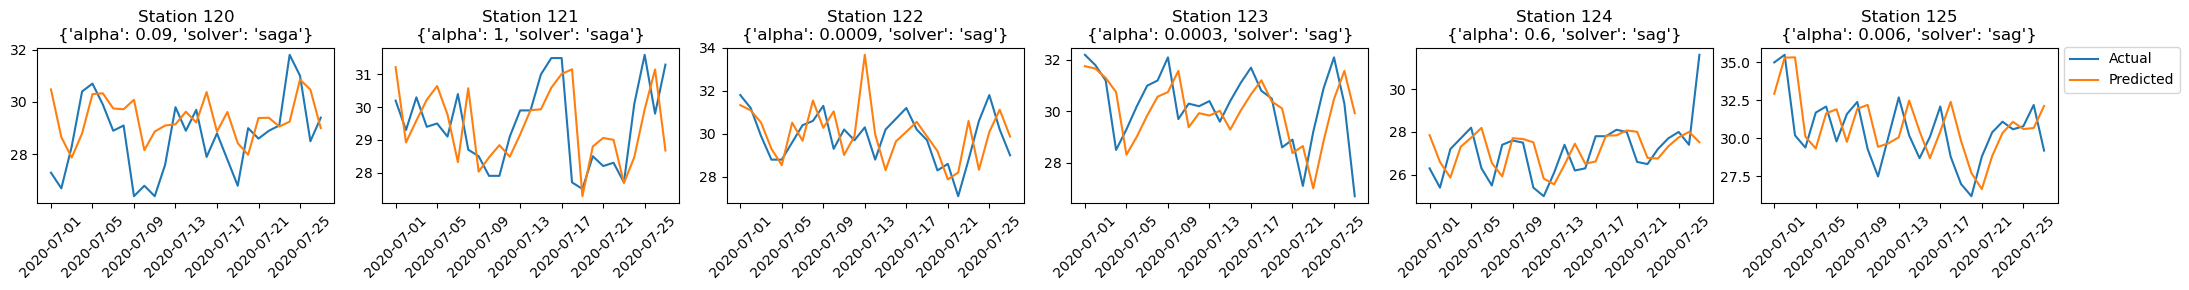

In [151]:
stations = sorted(weather_india_final['STATION'].unique())
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
fig.suptitle('Ridge Regression')
for i, station in enumerate(stations):
    df = weather_india_final[weather_india_final['STATION'] == station].copy() 
    df.drop(['STATION'], axis=1, inplace=True)
    
    train = df.loc[:'2020-06-30']
    X_train = train.drop('Target', axis=1)
    y_train = train['Target']
    

    test = df.loc['2020-07-01':]
    X_test = test.drop(['Target'], axis=1)
    y_test = test['Target']
    
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)
    
    grid_search = GridSearchCV(estimator=Ridge(), param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_scaled, y_train)
    
    preds = grid_search.predict(X_test_scaled)

    metrics = {'Station' : i, 'MAE': mean_absolute_error(y_test, preds), 'MSE' : mean_squared_error(y_test, preds), 'Accuracy' : str(round(100 - (np.mean(np.abs(y_test - preds) / y_test) * 100),2))+'%'}
    Ridge_metrics = Ridge_metrics.append(metrics,ignore_index=True)
    #print('Station:', station, 'MAE:', mean_absolute_error(y_test, preds),'MSE:',mean_squared_error(y_test, preds),r2_score(y_test, preds))
    
    combined = pd.concat([y_test, pd.Series(preds, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Predictions']
    
    count = i % 6
    ax[count].plot(combined.index, combined['Actual'], label='Actual')
    ax[count].plot(combined.index, combined['Predictions'], label='Predicted')
    ax[count].set_title(f'Station {station}\n{grid_search.best_params_}')
    ax[count].tick_params(axis='x', rotation=45)
    
    if (count == 5) or (i == (len(stations) - 1)):
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
        plt.tight_layout()
        plt.show()
        
        if i != (len(stations) - 1):
            fig, ax = plt.subplots(1, 6, figsize=(22, 3))

In [152]:
Ridge_metrics

Station       MAE       MSE Accuracy
0         0  0.941316  1.784521   96.57%
1         1  1.092758  2.080618    96.1%
2         2  1.309643  3.067618   94.99%
3         3  1.569784  3.955617   94.42%
4         4  1.069408  1.759392   96.31%
..      ...       ...       ...      ...
121     121  1.012360  1.629612   96.58%
122     122  1.040126  1.591350   96.52%
123     123  1.110696  1.794934   96.25%
124     124  0.907362  1.545503   96.67%
125     125  1.772780  4.425752   94.08%

[126 rows x 4 columns]

# SVR(Support Vector Regressor)

In [153]:
svr_metrics = pd.DataFrame(columns=['Station', 'MAE', 'MSE','Accuracy'])

In [154]:
params_svr = { 
                'kernel': ['linear', 'rbf','poly'], 
                'C':[1.5, 10],
                'gamma': [1e-7, 1e-4],
                'epsilon':[0.1,0.2,0.5,0.3]
             }

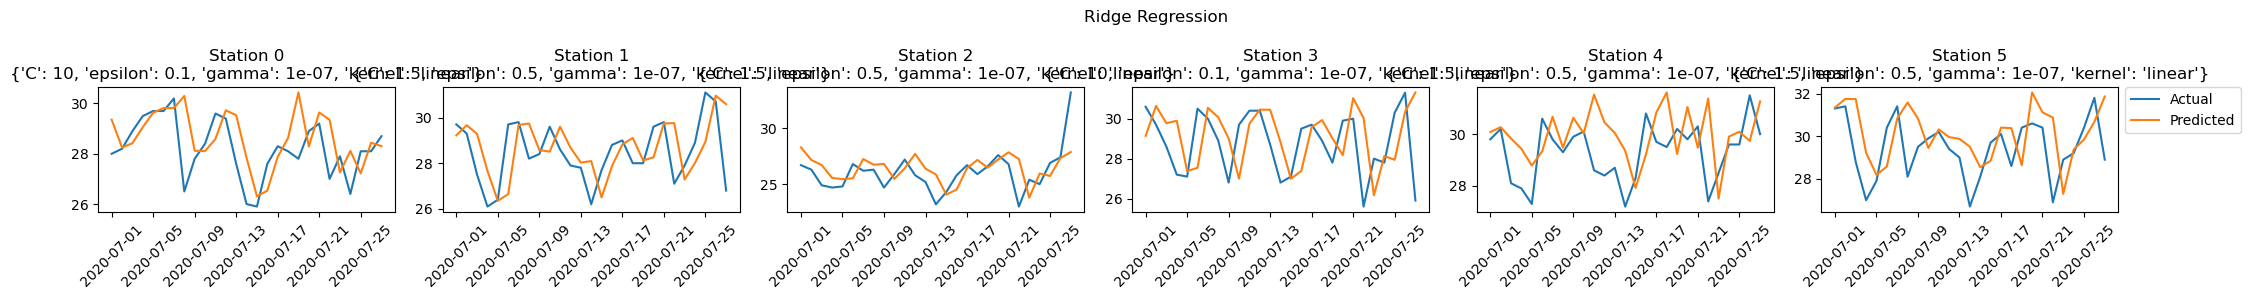

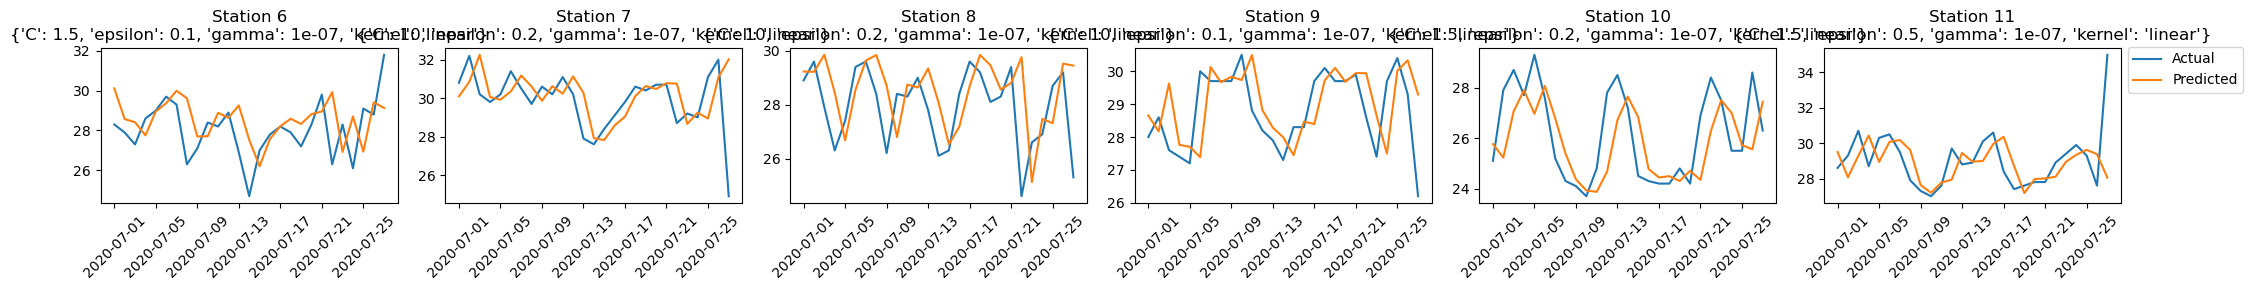

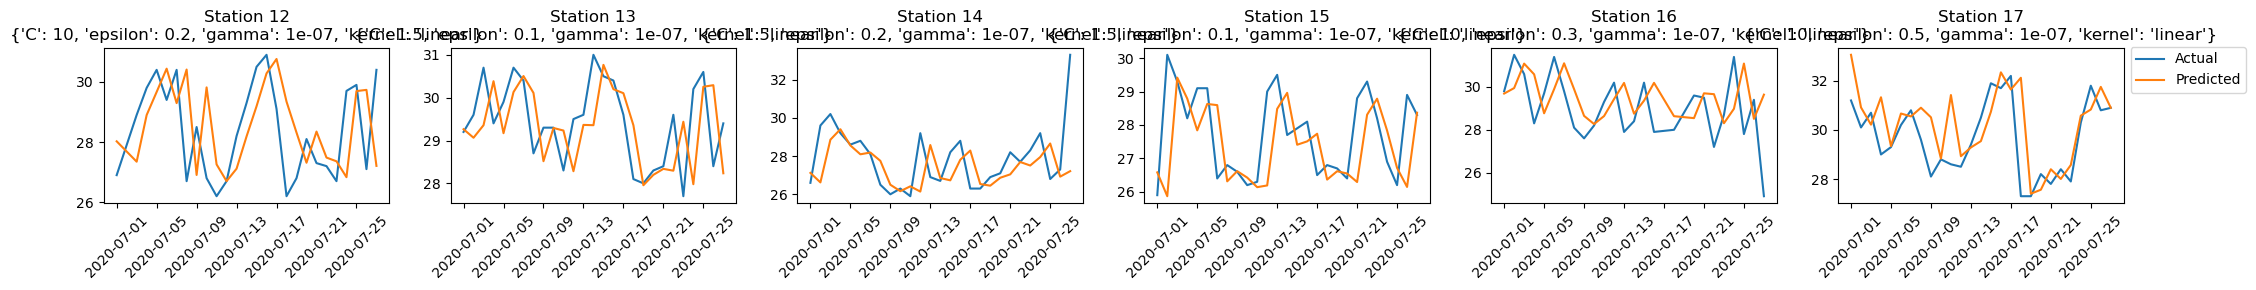

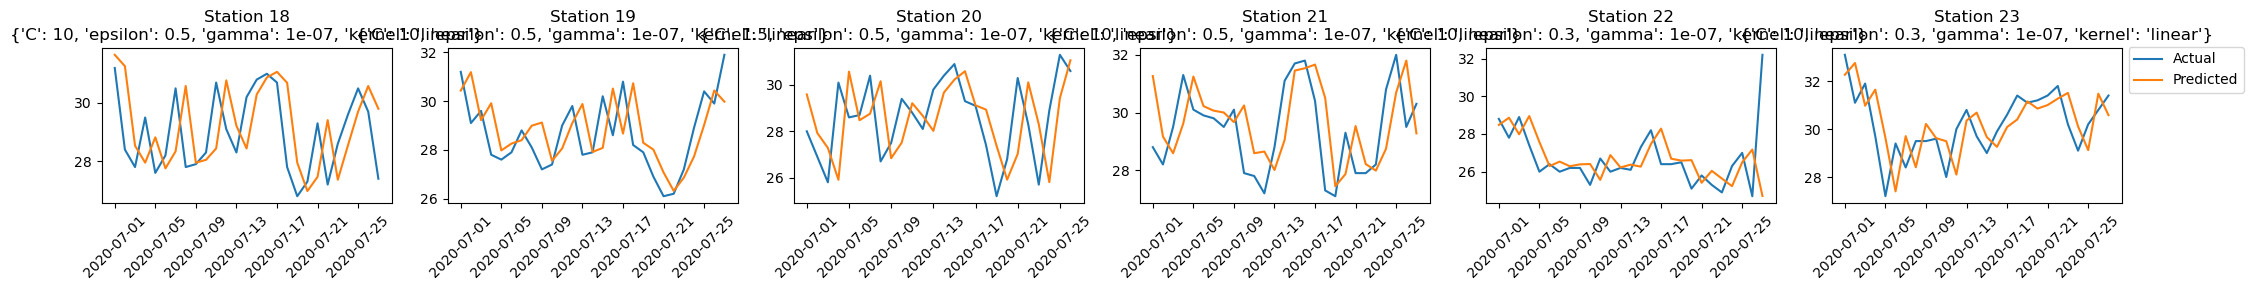

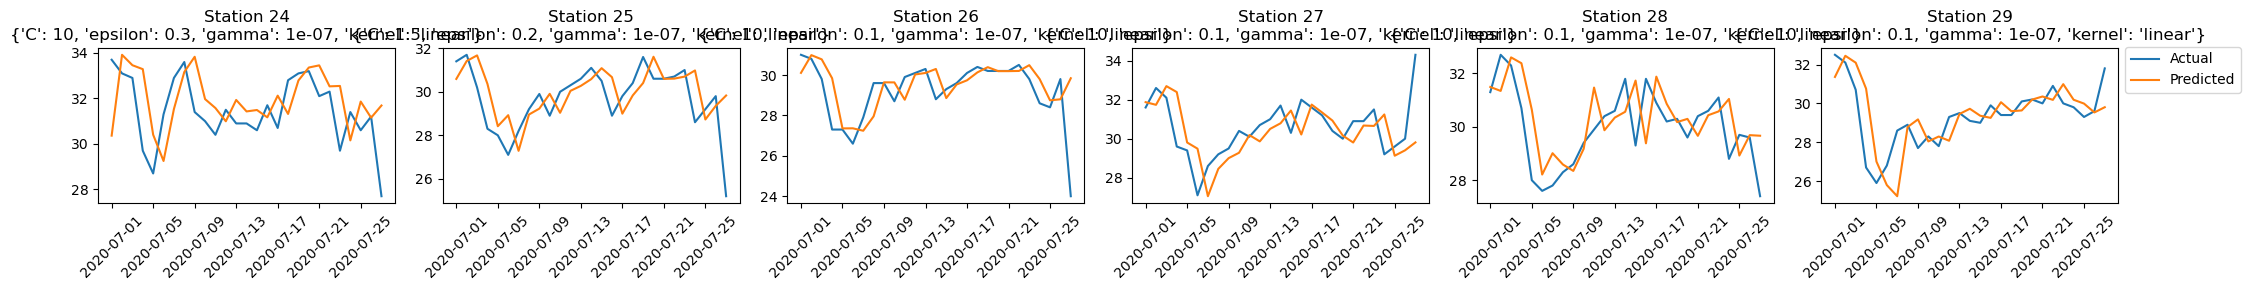

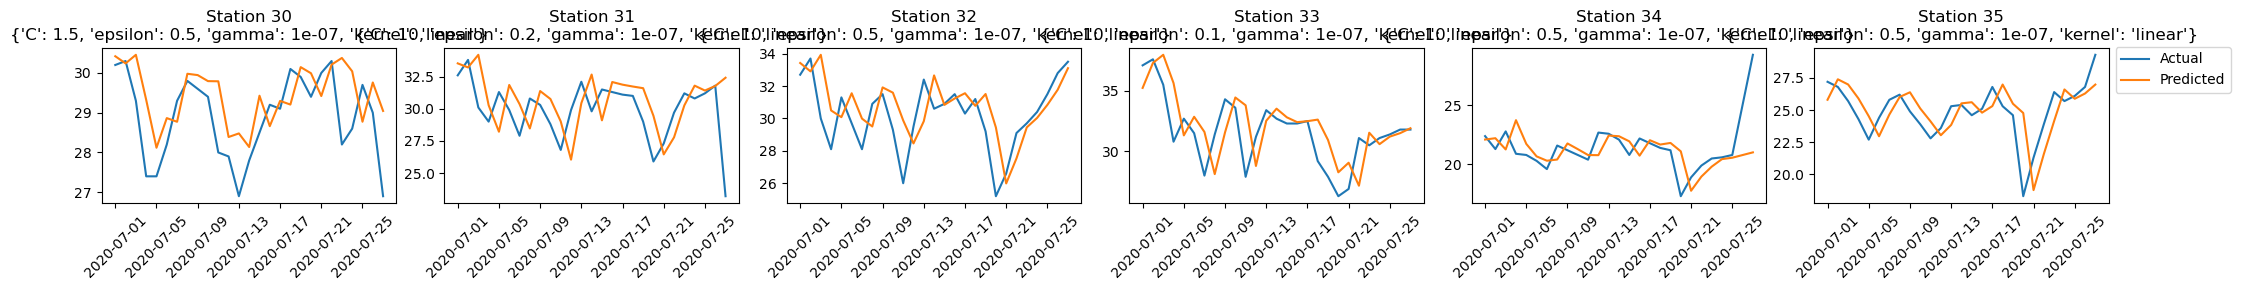

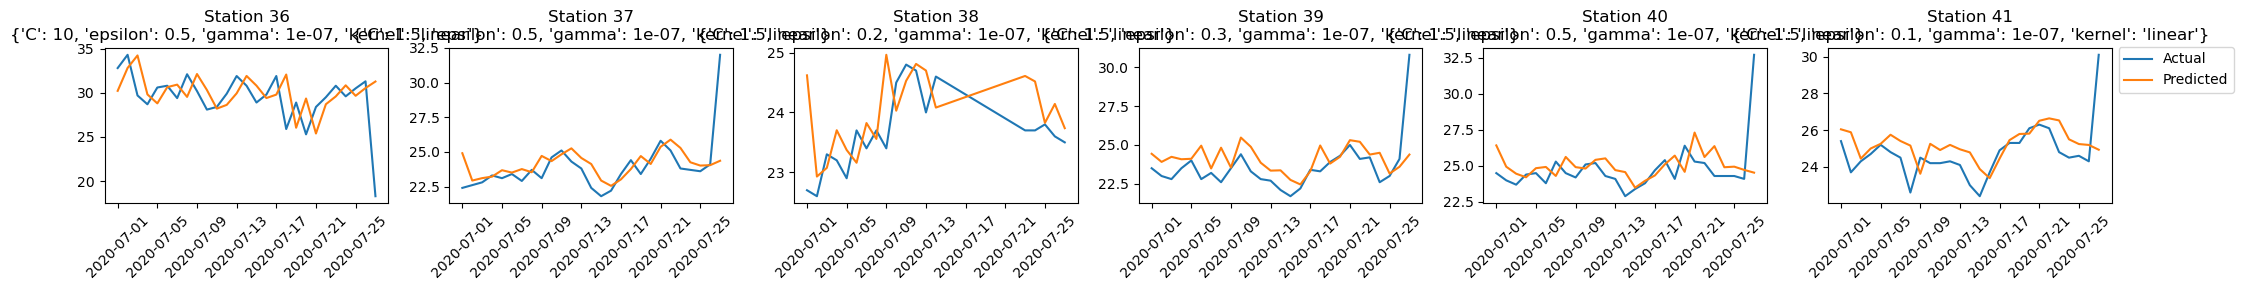

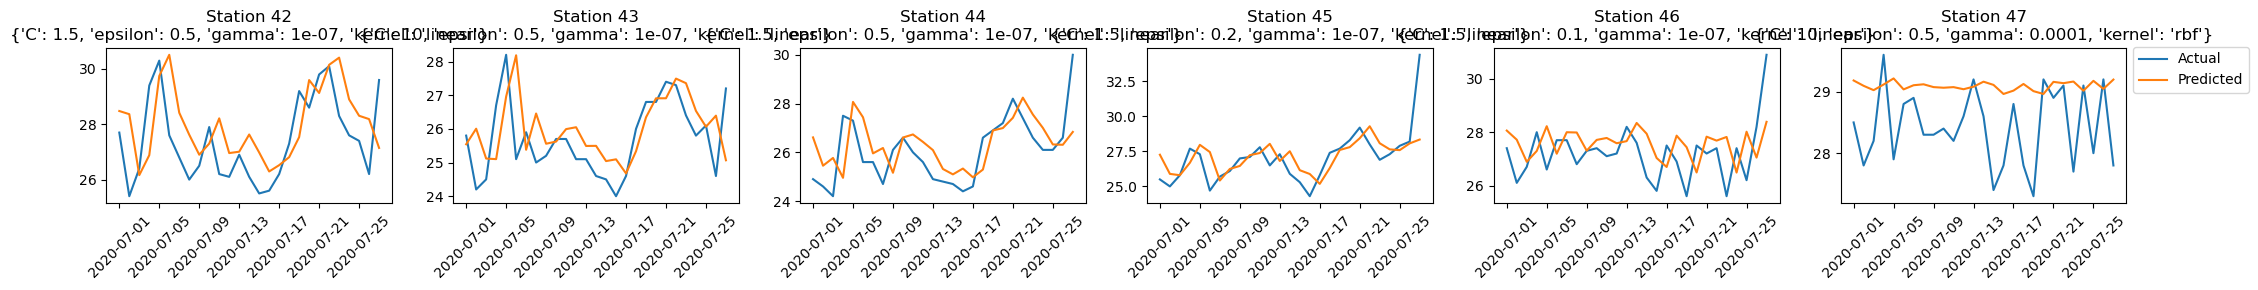

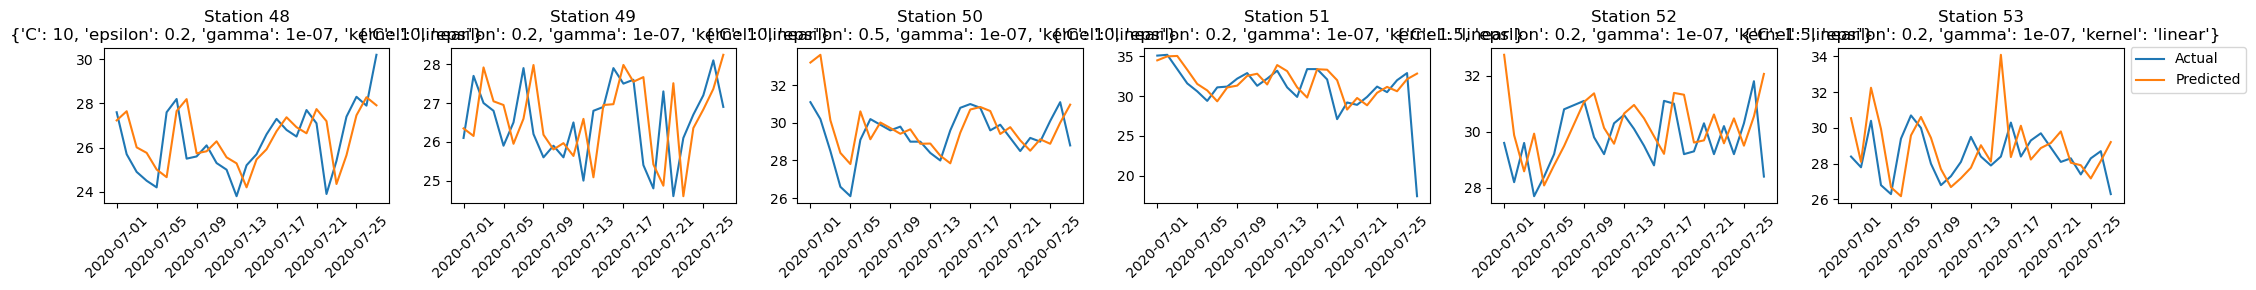

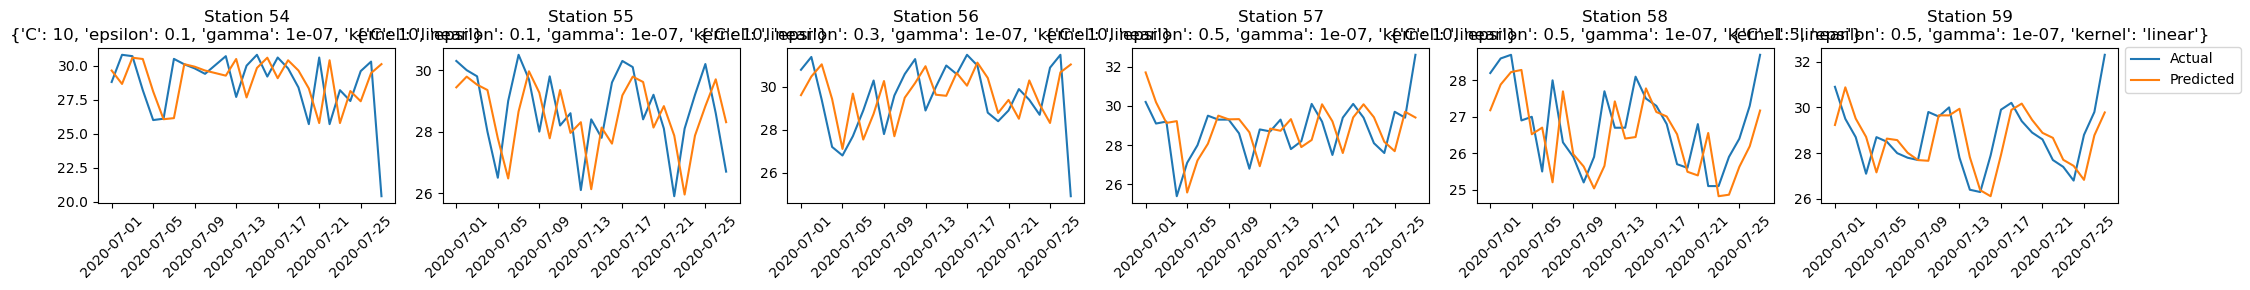

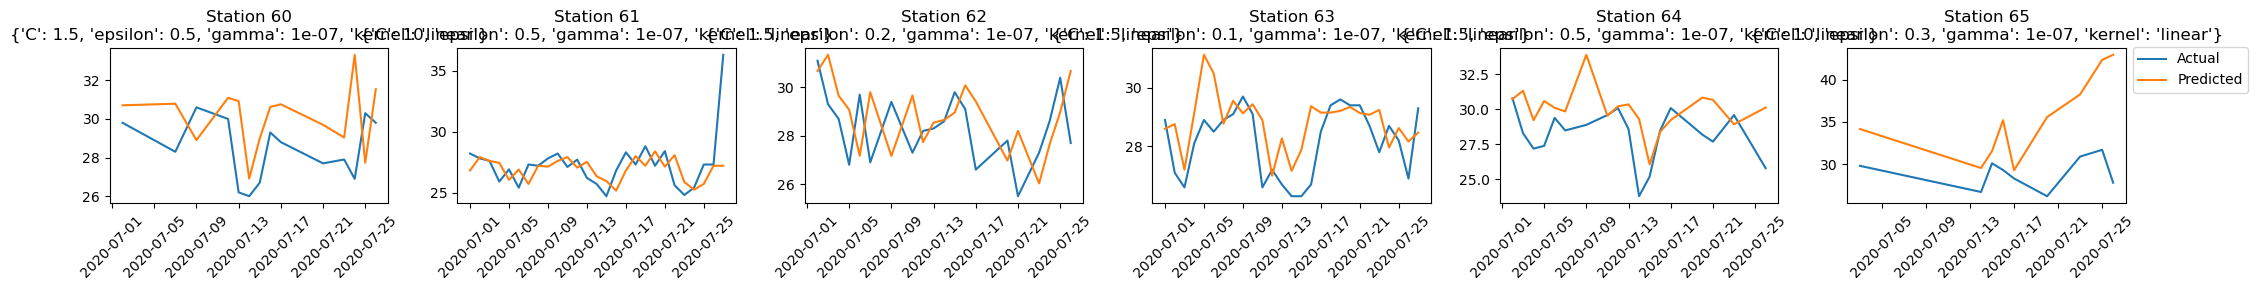

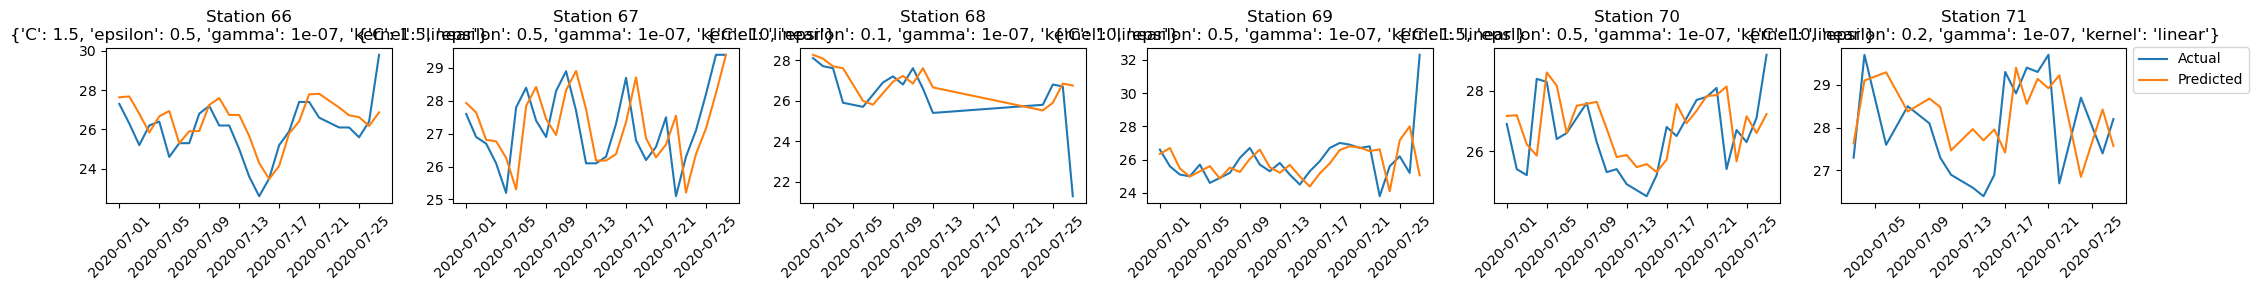

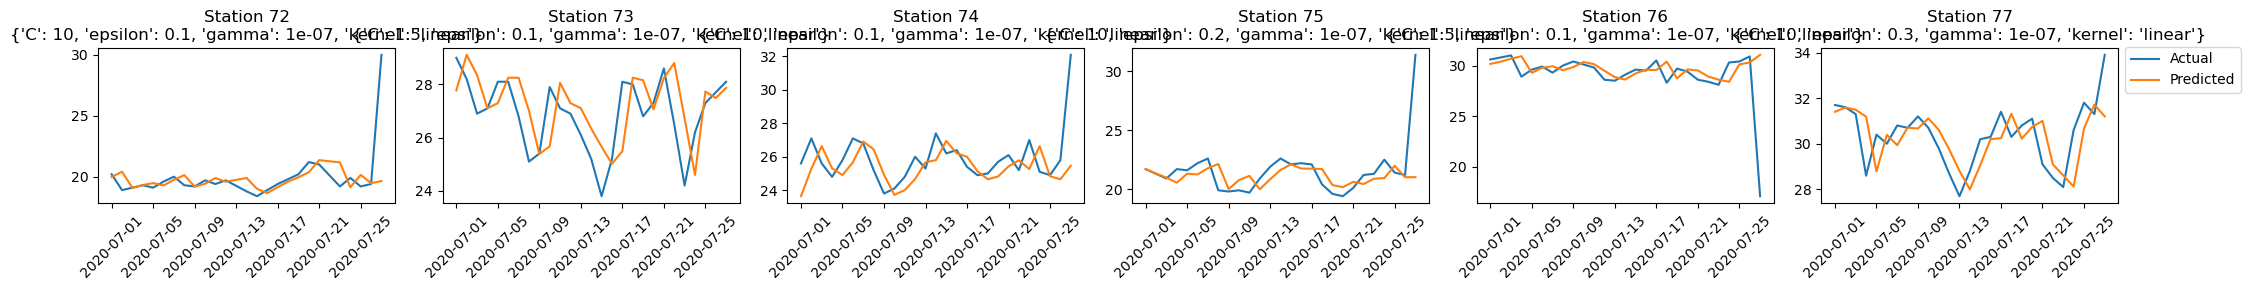

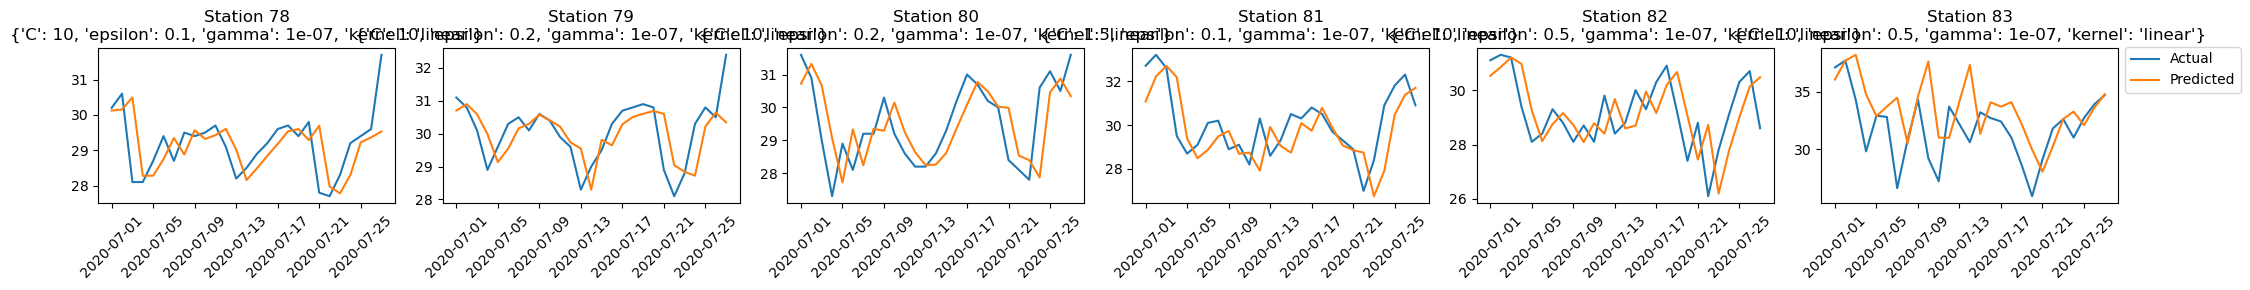

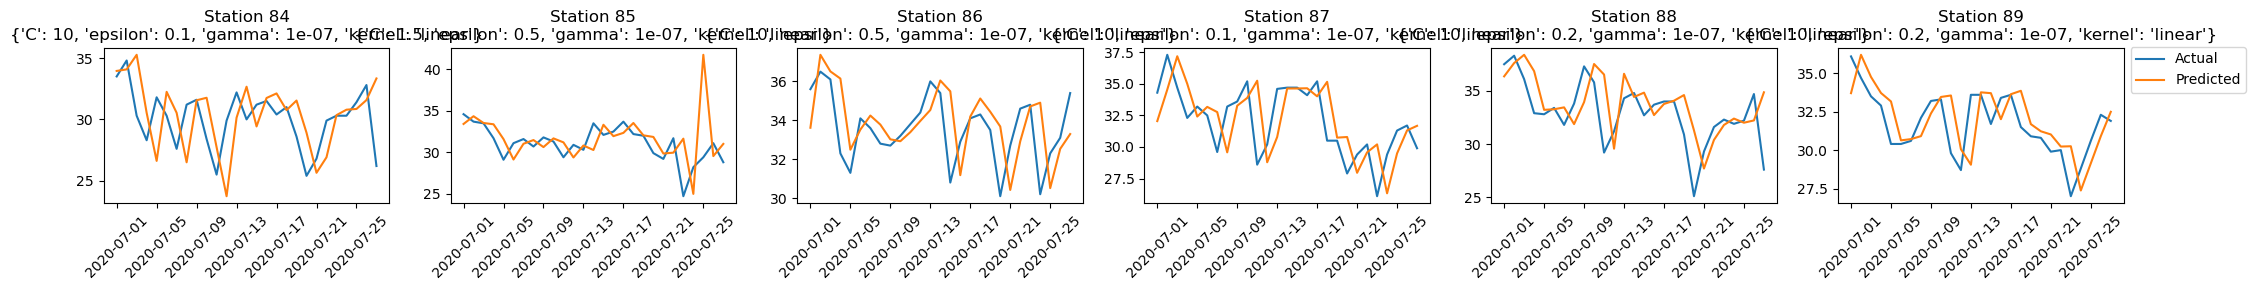

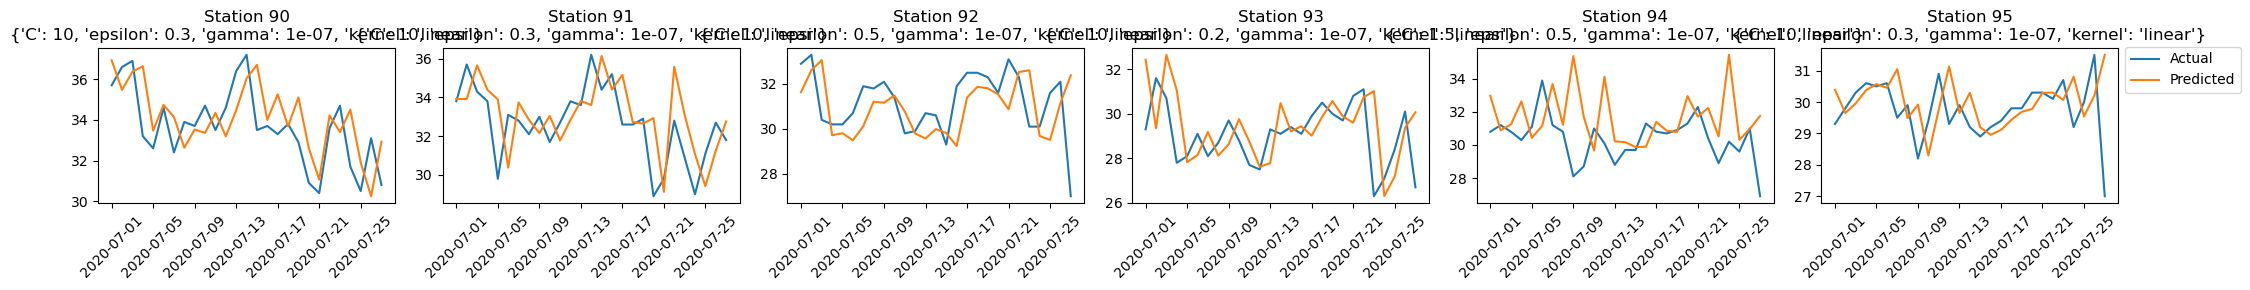

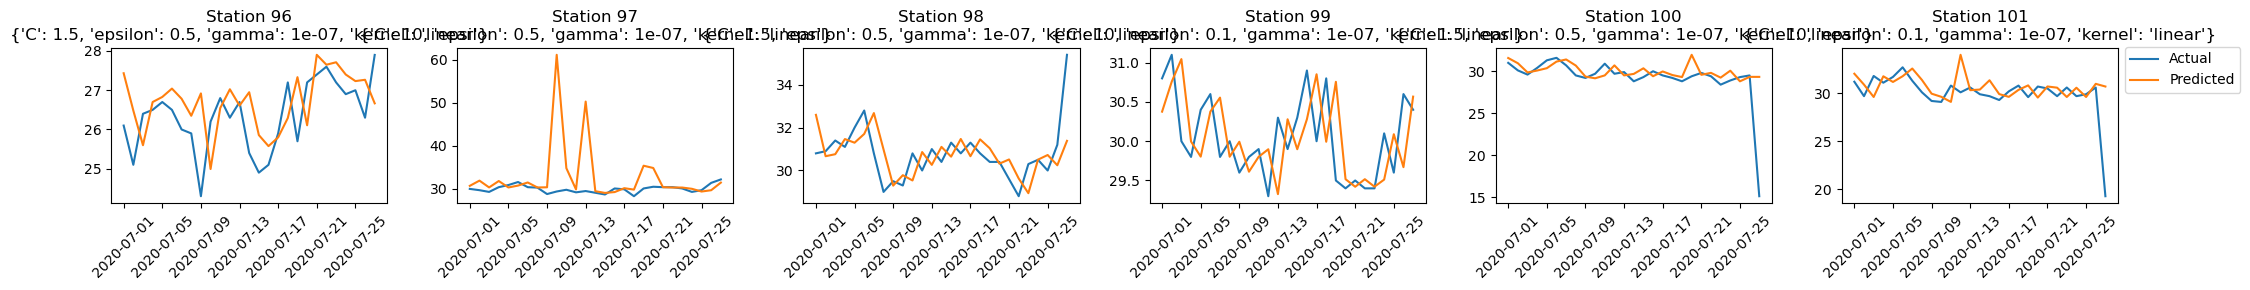

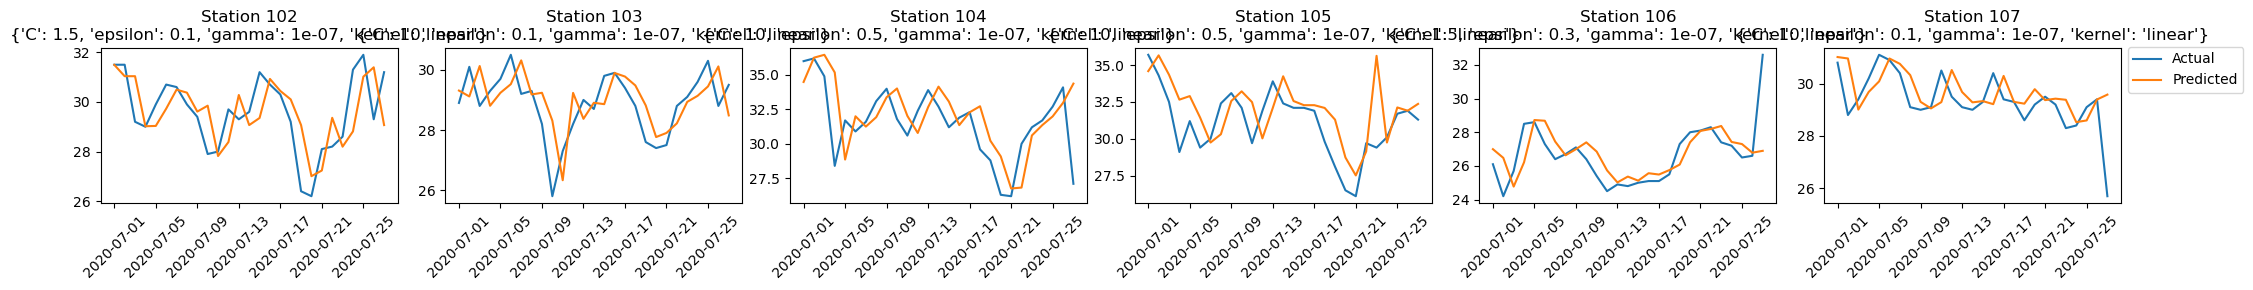

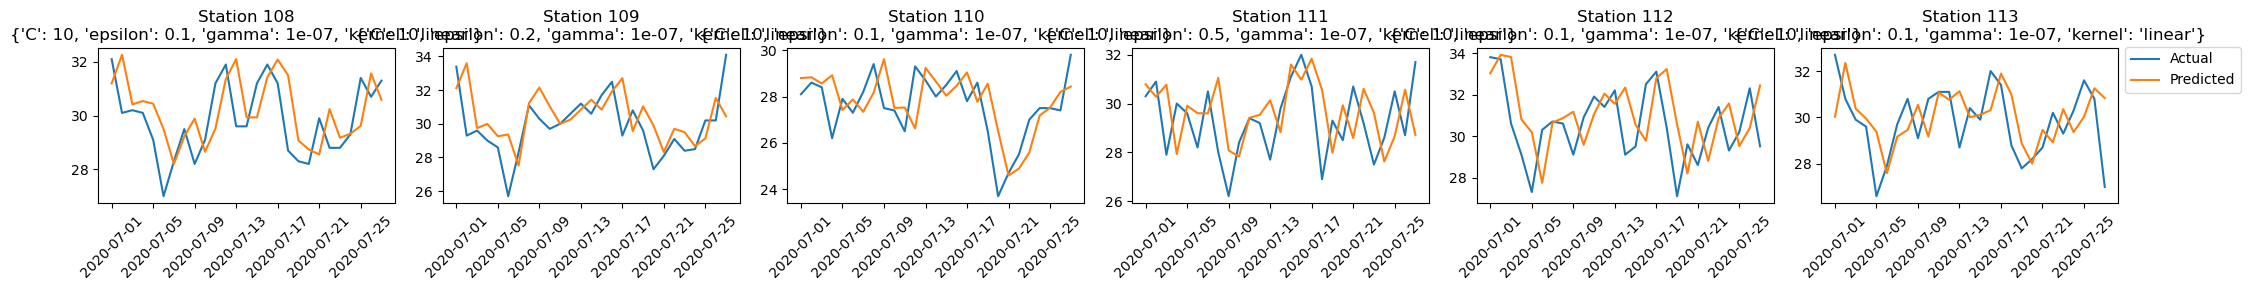

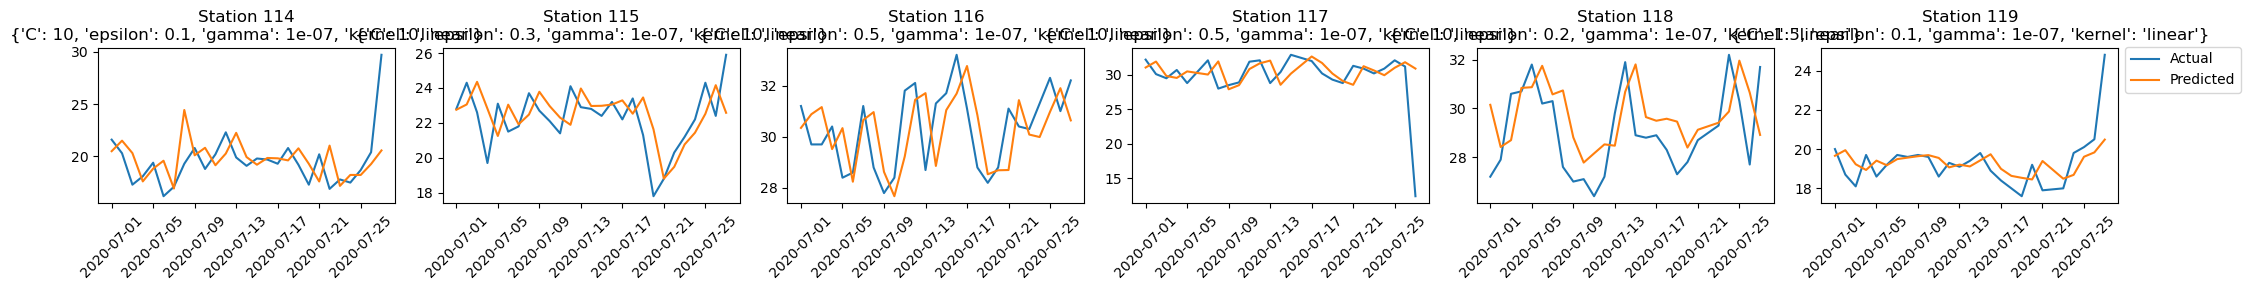

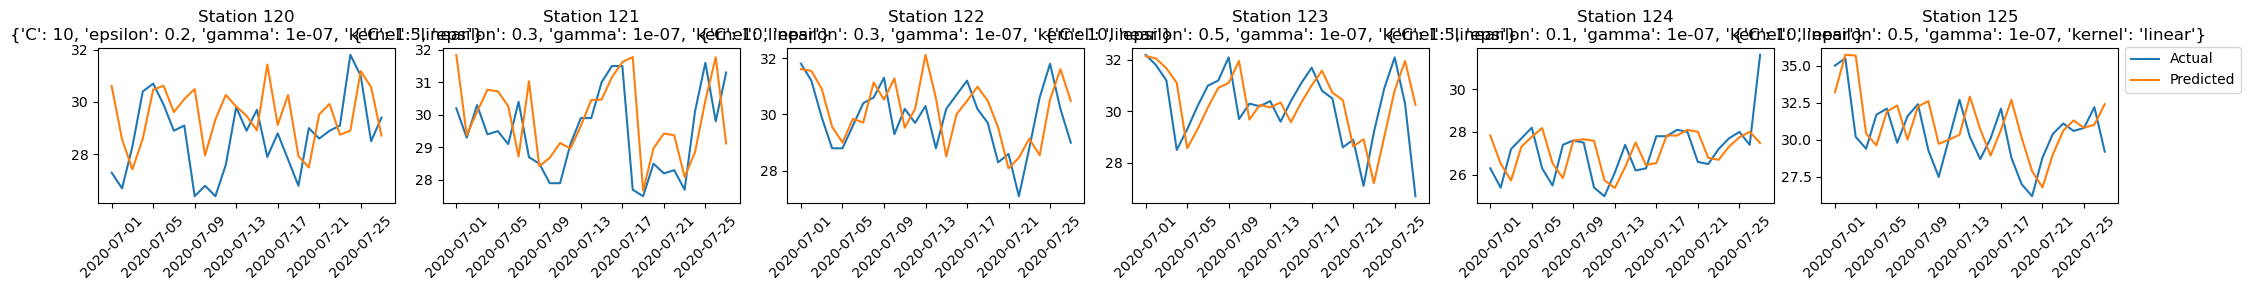

In [158]:
stations = sorted(weather_india_final['STATION'].unique())
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
fig.suptitle('Ridge Regression')
for i, station in enumerate(stations):
    df = weather_india_final[weather_india_final['STATION'] == station].copy() 
    df.drop(['STATION'], axis=1, inplace=True)
    
    train = df.loc[:'2020-06-30']
    X_train = train.drop('Target', axis=1)
    y_train = train['Target']
    

    test = df.loc['2020-07-01':]
    X_test = test.drop(['Target'], axis=1)
    y_test = test['Target']
    
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)
    
    svr = GridSearchCV(estimator=SVR(), param_grid=params_svr, scoring='neg_mean_squared_error', cv=2)
    svr.fit(X_train_scaled, y_train)
    
    preds = svr.predict(X_test_scaled)

    metrics = {'Station' : i, 'MAE': mean_absolute_error(y_test, preds), 'MSE' : mean_squared_error(y_test, preds), 'Accuracy' : str(round(100 - (np.mean(np.abs(y_test - preds) / y_test) * 100),2))+'%'}
    svr_metrics = svr_metrics.append(metrics,ignore_index=True)
    #print('Station:', station, 'MAE:', mean_absolute_error(y_test, preds),'MSE:',mean_squared_error(y_test, preds),r2_score(y_test, preds))
    
    combined = pd.concat([y_test, pd.Series(preds, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Predictions']
    
    count = i % 6
    ax[count].plot(combined.index, combined['Actual'], label='Actual')
    ax[count].plot(combined.index, combined['Predictions'], label='Predicted')
    ax[count].set_title(f'Station {station}\n{svr.best_params_}')
    ax[count].tick_params(axis='x', rotation=45)
    
    if (count == 5) or (i == (len(stations) - 1)):
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
        plt.tight_layout()
        plt.show()
        
        if i != (len(stations) - 1):
            fig, ax = plt.subplots(1, 6, figsize=(22, 3))

In [159]:
svr_metrics

Station       MAE       MSE             Accuracy
0         0  0.920518  1.648236   92.05177387637478%
1         1  1.090028  2.106150  109.00278768587357%
2         2  1.319318  3.112769  131.93180444568105%
3         3  1.602908  4.144553  160.29076951607917%
4         4  1.249846  2.342965  124.98456388584654%
..      ...       ...       ...                  ...
247     121  1.025325  1.847301                96.5%
248     122  0.957122  1.229096               96.78%
249     123  1.059875  1.850282                96.4%
250     124  0.923755  1.604273               96.61%
251     125  1.778333  4.812790               94.03%

[252 rows x 4 columns]